# PROBLEM STATEMENT

The Bank Indessa has not done well in the last 3 quarters. Their NPAs (Non Performing Assets)
have reached all time high. It is starting to lose the confidence of its investors. As a result, it’s stock
has fallen by 20% in the previous quarter alone.
After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With
the messy data collected over all the years, this bank has decided to use machine learning to figure
out a way to find these defaulters and devise a plan to reduce them.
This bank uses a pool of investors to sanction their loans. For example: If any customer has applied
for a loan of $20000, along with the bank, the investors perform due diligence on the requested loan
application. Keep this in mind while understanding data.
In this challenge, you will help this bank by predicting the probability that a member will default.

# DATASET

https://drive.google.com/file/d/1jIUQO0POfYslbO9ru_Z3Cb5nPaEnGbv-/view?usp=sharing

In [1]:
!unzip '/content/drive/MyDrive/ML Interview/artivatic/ML_Artivatic_dataset.zip' -d '/content/drive/MyDrive/ML Interview/artivatic/'

Archive:  /content/drive/MyDrive/ML Interview/artivatic/ML_Artivatic_dataset.zip
   creating: /content/drive/MyDrive/ML Interview/artivatic/ML_Artivatic_dataset/
  inflating: /content/drive/MyDrive/ML Interview/artivatic/ML_Artivatic_dataset/sample_submission.csv  
  inflating: /content/drive/MyDrive/ML Interview/artivatic/ML_Artivatic_dataset/test_indessa.csv  
  inflating: /content/drive/MyDrive/ML Interview/artivatic/ML_Artivatic_dataset/train_indessa.csv  


In [1]:
import pandas as pd
train_data = pd.read_csv('/content/drive/MyDrive/ML Interview/artivatic/ML_Artivatic_dataset/train_indessa.csv')
train_data.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
5,10247268,15000,15000,14950.0,36 months,BAT2575549,8.90,A,A5,Design Consultant,2 years,MORTGAGE,120000.0,Not Verified,n,> We are requesting this loan to help re-or...,debt_consolidation,Credit Card Debt Consolidation,461xx,IN,12.30,0.0,0.0,56.0,NaN,18.0,0.0,19040.0,64.5,30.0,f,1957.24,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,113th week,0.0,0.0,350619.0,29500.0,0
6,8089625,5000,5000,4975.0,36 months,,7.90,A,A4,TOYOTA OF NORTH HOLLYWOOD,5 years,RENT,75000.0,Source Verified,n,> Funds will be used to pay off a debt. I am a...,debt_consolidation,PAY THEM OFF,913xx,CA,5.70,0.0,0.0,NaN,105.0,13.0,2.0,13272.0,23.9,23.0,f,578.36,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,117th week,0.0,1023.0,13272.0,55500.0,1
7,23043116,6000,6000,6000.0,36 months,NaN,9.17,B,B1,Banker,8 years,MORTGAGE,54000.0,Not Verified,n,NaN,credit_card,Credit card refinancing,351xx,AL,11.63,0.0,1.0,46.0,NaN,13.0,0.0,3484.0,29.5,49.0,f,637.51,0.0,0.0,0.0,0.0,54.0,INDIVIDUAL,NaN,78th week,0.0,0.0,272579.0,11800.0,0
8,45900933,6000,6000,6000.0,36 months,BAT4136152,13.99,C,C4,LVN,7 years,MORTGAGE,92000.0,Not Verified,n,NaN,home_improvement,Home improvement,917xx,CA,30.85,0.0,0.0,77.0,NaN,16.0,0.0,47567.0,76.6,27.0,w,621.72,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,44th week,0.0,0.0,281521.0,62100.0,0
9,41272507,34550,34550,34550.0,60 months,BAT4694572,17.14,D,D4,Registered Nurse,2 years,MORTGAGE,72000.0,Verified,n,NaN,debt_consolidation,Debt consolidation,427xx,KY,33.92,0.0,0.0,NaN,NaN,12.0,0.0,30040.0,90.5,30.0,w,5535.46,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,52th week,0.0,0.0,76034.0,33200.0,0


In [2]:
train_data.shape

(532428, 45)

In [3]:
y = train_data['loan_status'].values
train_data = train_data.drop(columns=['loan_status'])

In [4]:
import pandas as pd
test_data = pd.read_csv('/content/drive/MyDrive/ML Interview/artivatic/ML_Artivatic_dataset/test_indessa.csv')
test_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,4 years,RENT,73500.0,Source Verified,n,NaN,credit_card,wrap it up,450xx,OH,28.65,1.0,1.0,20.0,NaN,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,5 years,MORTGAGE,105000.0,Source Verified,n,NaN,major_purchase,Major purchase,275xx,NC,31.19,0.0,0.0,NaN,NaN,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,10+ years,RENT,62300.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,672xx,KS,21.73,1.0,0.0,23.0,115.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,10+ years,OWN,150000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,961xx,CA,17.27,0.0,0.0,NaN,NaN,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,5 years,MORTGAGE,52000.0,Not Verified,n,NaN,major_purchase,Major purchase,707xx,LA,20.19,0.0,0.0,NaN,NaN,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [5]:
test_data.shape

(354951, 44)

In [6]:
import re,numpy as np

train_data = train_data.drop(columns=['member_id',
                                      'title',
                                      'emp_title',                                     
                                      'batch_enrolled',
                                      'zip_code'])

train_data['term'] = train_data['term'].apply(lambda x : int(x.split()[0]))
train_data['emp_length'] = train_data['emp_length'].apply(lambda x : int(re.findall(r'[0-9]+', str(x))[0]) if len(re.findall(r'[0-9]+', str(x))) > 0  else np.nan) 
train_data['last_week_pay'] = train_data['last_week_pay'].apply(lambda x: np.nan if x == 'NAth week' else int(x.split('th')[0]))

In [35]:
import re,numpy as np

test_member_ids = test_data['member_id'].values

test_data = test_data.drop(columns=[  'member_id',
                                      'title',
                                      'emp_title',                                     
                                      'batch_enrolled',
                                      'zip_code'])

test_data['term'] = test_data['term'].apply(lambda x : int(x.split()[0]))
test_data['emp_length'] = test_data['emp_length'].apply(lambda x : int(re.findall(r'[0-9]+', str(x))[0]) if len(re.findall(r'[0-9]+', str(x))) > 0  else np.nan) 
test_data['last_week_pay'] = test_data['last_week_pay'].apply(lambda x: np.nan if x == 'NAth week' else int(x.split('th')[0]))

# EXPLORATORY DATA ANALYSIS

### Class Imbalance

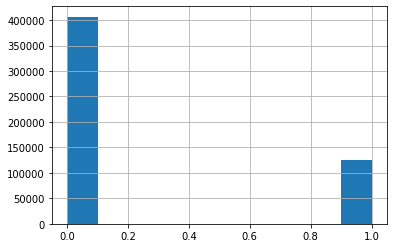

In [ ]:
import matplotlib.pyplot as plt

train_data['loan_status'].hist()
plt.show()

In [ ]:
train_data.groupby('loan_status').count()['member_id']/train_data.shape[0]

loan_status
0    0.763673
1    0.236327
Name: member_id, dtype: float64

**The dataset has class imbalance. The dataset has 23.63 % loan defaulter data as compared to 76.36 % non defaulter data.**

### Highly correlated features

loan_amnt,funded_amnt,funded_amnt_inv

collection_recovery_fee,recoveries

In [ ]:
train_data.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
member_id,1.000000,0.069555,0.072042,0.081060,-0.135451,0.047478,0.125306,0.055381,-0.113739,-0.011965,-0.174292,0.080080,0.090301,0.023129,-0.056536,0.030447,-0.588023,-0.094724,-0.193877,-0.186575,0.055027,0.054861,0.019652,0.064953,0.013937,0.046878,-0.502357
loan_amnt,0.069555,1.000000,0.999371,0.996457,0.117251,0.504832,0.054468,0.008051,-0.041101,-0.036568,0.016440,0.214921,-0.112174,0.499843,0.122152,0.236814,0.549022,-0.012886,-0.001737,-0.003508,-0.016619,-0.029951,0.003704,-0.077209,0.353885,0.461360,-0.099438
funded_amnt,0.072042,0.999371,1.000000,0.997308,0.117633,0.504506,0.055246,0.008341,-0.041550,-0.036527,0.016391,0.215299,-0.111784,0.499679,0.122651,0.236687,0.548438,-0.013336,-0.002630,-0.004250,-0.016452,-0.029948,0.003806,-0.077210,0.353884,0.461359,-0.101273
funded_amnt_inv,0.081060,0.996457,0.997308,1.000000,0.117322,0.502994,0.057822,0.008959,-0.043827,-0.033749,0.031649,0.216193,-0.109965,0.498303,0.123000,0.236946,0.543950,-0.016687,-0.006103,-0.007654,-0.015896,-0.029719,0.004017,-0.077188,0.353887,0.461474,-0.107302
int_rate,-0.135451,0.117251,0.117633,0.117322,1.000000,-0.121714,0.165061,0.067193,0.230603,-0.033612,0.023137,-0.013588,0.068903,-0.031968,0.277878,-0.050223,0.420295,0.055344,0.111013,0.109771,0.014666,-0.013413,0.027951,0.033143,-0.093445,-0.236184,0.006306
annual_inc,0.047478,0.504832,0.504506,0.502994,-0.121714,1.000000,-0.211890,0.087837,0.039191,-0.081022,-0.091774,0.243276,-0.051753,0.410833,0.073964,0.328515,0.200978,-0.007603,-0.035692,-0.035164,-0.005905,-0.060331,0.023332,-0.036257,0.532529,0.407701,-0.005678
dti,0.125306,0.054468,0.055246,0.057822,0.165061,-0.211890,1.000000,-0.009105,-0.006255,0.002400,0.068421,0.321468,-0.049885,0.246867,0.168549,0.234839,0.028663,-0.011665,-0.008564,-0.007734,0.000879,0.029506,0.007184,-0.024015,0.107690,0.141701,-0.128643
delinq_2yrs,0.055381,0.008051,0.008341,0.008959,0.067193,0.087837,-0.009105,1.000000,0.015907,-0.819877,-0.071925,0.059560,-0.027577,-0.059239,-0.021342,0.128815,0.004887,0.017925,-0.010282,-0.008419,0.073286,-0.536527,0.143899,0.035401,0.087359,-0.061385,-0.048629
inq_last_6mths,-0.113739,-0.041101,-0.041550,-0.043827,0.230603,0.039191,-0.006255,0.015907,1.000000,0.018578,-0.073100,0.115745,0.068835,-0.053578,-0.083463,0.131149,0.081894,0.031803,0.061310,0.059340,0.006108,0.012099,-0.006066,0.030929,0.029613,-0.008570,0.081301
mths_since_last_delinq,-0.011965,-0.036568,-0.036527,-0.033749,-0.033612,-0.081022,0.002400,-0.819877,0.018578,1.000000,0.005314,-0.055233,0.116126,-0.012875,0.018202,-0.051834,-0.028451,-0.023495,0.002604,0.001042,-0.040550,0.692487,-0.165959,0.051891,-0.109733,-0.027057,0.031916


In [7]:
train_data = train_data.drop(columns = ['loan_amnt','funded_amnt_inv','collection_recovery_fee'])

In [37]:
test_data = test_data.drop(columns = ['loan_amnt','funded_amnt_inv','collection_recovery_fee'])

## UNIVARIATE ANALYSIS

In [21]:
train_data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

### loan_amnt

loan amount ($) applied by the member

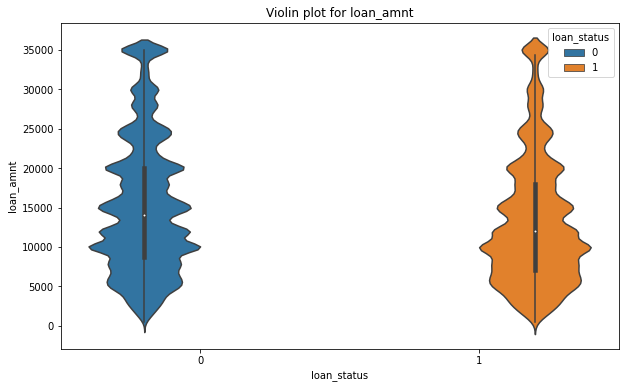

In [25]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x="loan_status", y="loan_amnt", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for loan_amnt')
plt.show()

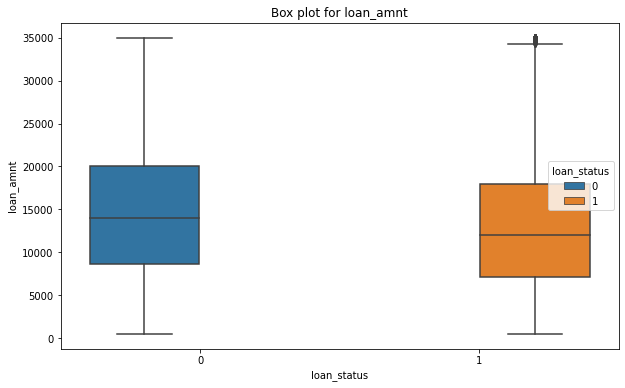

In [30]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='loan_status',y='loan_amnt', data=train_data,hue='loan_status')\
        .set(title='Box plot for loan_amnt')
plt.show()

In [29]:
train_data.groupby('loan_status').mean()['loan_amnt']

loan_status
0    15206.679337
1    13306.413965
Name: loan_amnt, dtype: float64

**Higher Loan amount decreases the chances of loan default**

### term
term of loan (in months)

In [36]:
train_data['term'].unique()

array([36, 60])

In [41]:
train_data.groupby(['term','loan_status']).count()['member_id']

term  loan_status
36    0              271120
      1              101673
60    0              135481
      1               24154
Name: member_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


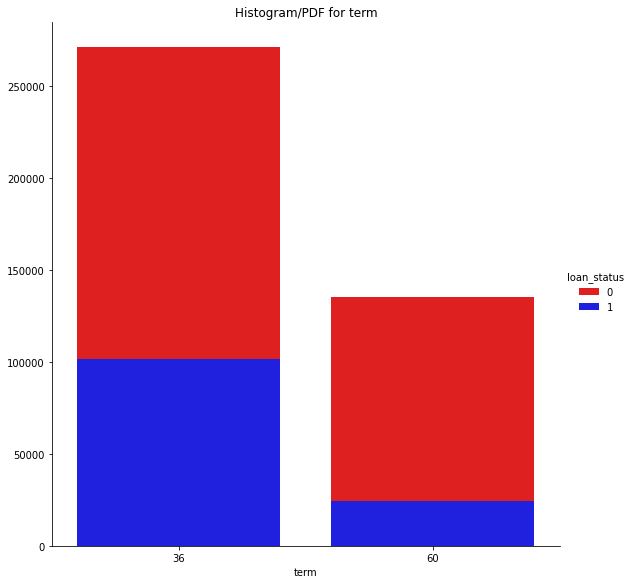

In [39]:
sns.FacetGrid(train_data, hue="loan_status",palette = ['Red','Blue'],size=8) \
   .map(sns.countplot, "term") \
   .set(title='Histogram/PDF for term')\
   .add_legend();
plt.show();

**Lower term (36 months) are more likely to default than higher term(60 months)**

### batch_enrolled

batch numbers allotted to members

In [16]:
train_data['batch_enrolled'].unique().shape[0]

105

In [17]:
list(train_data['batch_enrolled'].isna()).count(True)/train_data.shape[0]

0.1599258491288963

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


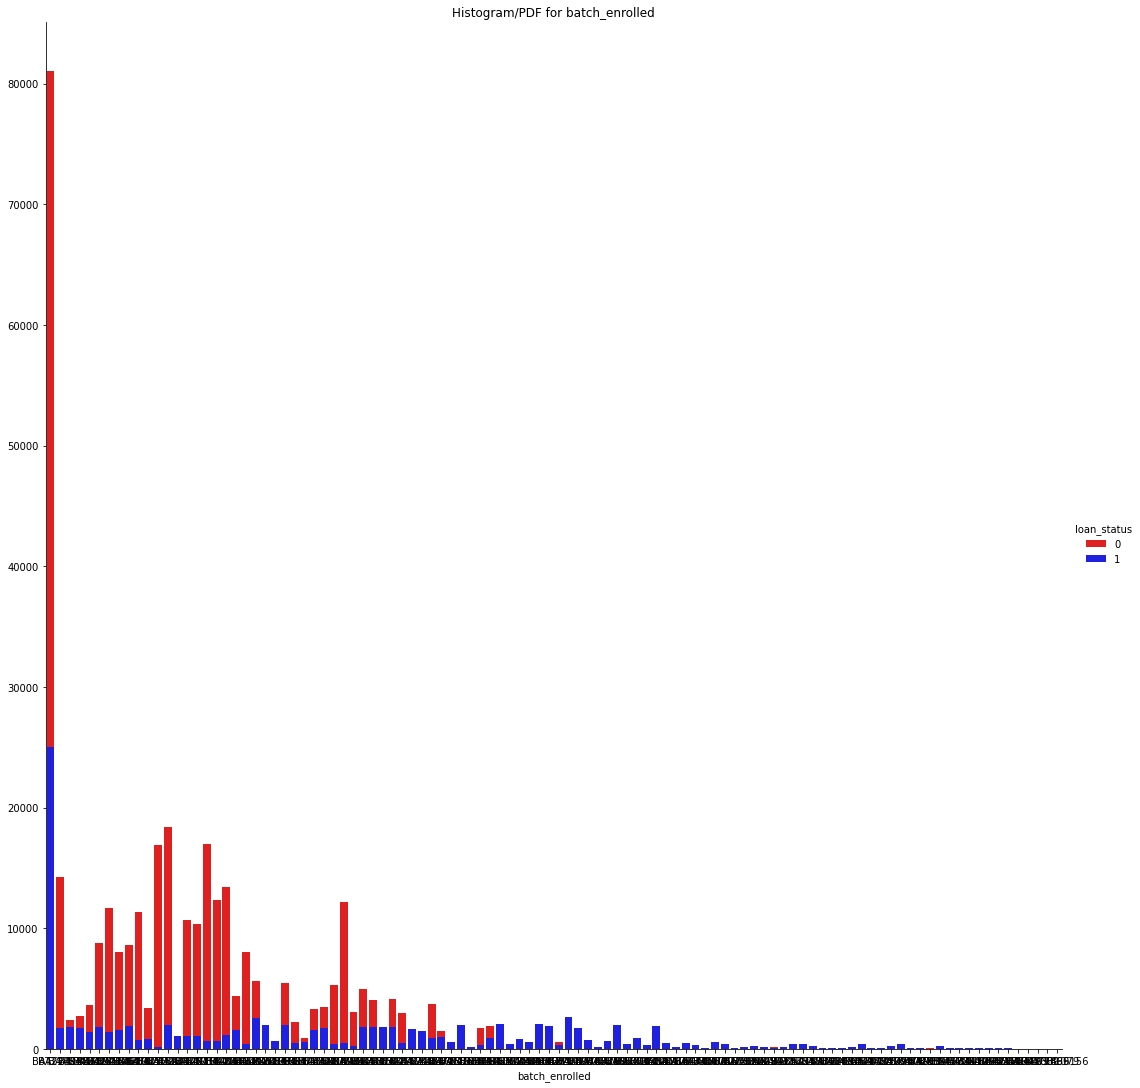

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.FacetGrid(train_data, hue="loan_status",palette = ['Red','Blue'],size=15) \
   .map(sns.countplot, "batch_enrolled") \
   .set(title='Histogram/PDF for batch_enrolled')\
   .add_legend();
plt.show();

### int_rate
interest rate (%) on loan

In [99]:
train_data['int_rate'].unique()

array([19.19, 10.99,  7.26, 19.72, 10.64,  8.9 ,  7.9 ,  9.17, 13.99,
       17.14, 13.33, 18.49,  6.99,  6.03, 13.65, 15.61, 21.7 , 16.99,
        9.99, 17.86,  6.62, 17.57, 13.66,  7.89, 12.99,  6.92, 16.59,
       12.69,  8.18, 19.52, 13.98, 14.85, 18.55, 20.49, 12.29,  8.19,
       16.49,  8.39, 18.75, 13.67, 16.29, 24.08, 14.31,  8.67, 11.14,
       17.76, 14.64, 14.48, 14.65, 12.12, 16.55, 13.18, 23.83, 11.67,
       18.84, 19.99, 14.33, 18.2 , 23.4 , 10.38, 15.99, 14.99, 13.35,
       18.25, 12.39, 24.99, 22.99, 10.16,  5.32, 19.42, 11.99, 13.11,
       20.99, 11.44, 16.78, 18.78, 13.49, 18.85, 21.99, 14.49, 10.15,
       21.67,  6.89, 11.53, 12.49,  9.49,  9.76, 20.31,  7.49, 15.31,
       22.15, 12.59, 28.49, 18.99, 12.85, 16.32,  6.24,  6.49, 25.57,
       11.55, 10.65, 13.53, 14.98, 21.15,  7.69,  9.71, 13.8 , 11.71,
       12.05, 20.5 ,  8.38, 19.05, 23.99, 18.24, 22.47, 15.59, 16.2 ,
       12.35, 16.24,  7.62, 14.3 ,  5.42,  6.17, 15.23, 21.49,  6.68,
       14.09, 17.97,

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


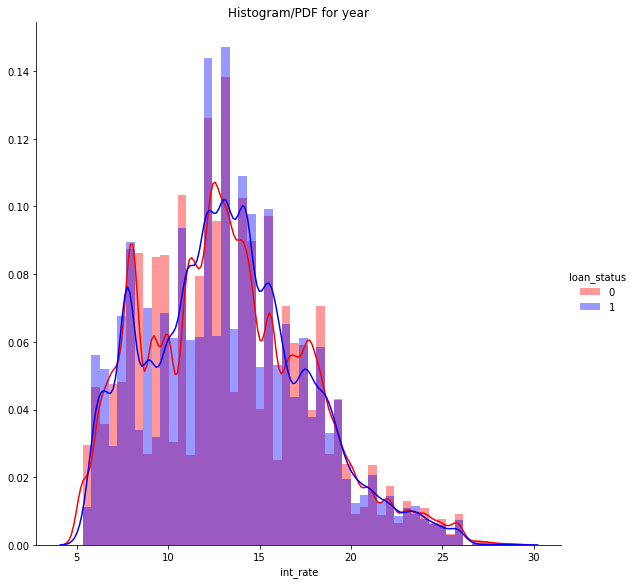

In [44]:
sns.FacetGrid(train_data, hue="loan_status",palette = ['Red','Blue'],size=8) \
   .map(sns.distplot, "int_rate") \
   .set(title='Histogram/PDF for year')\
   .add_legend();
plt.show();

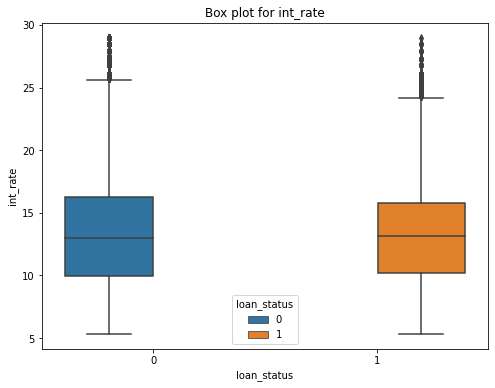

In [46]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='loan_status',y='int_rate', data=train_data,hue='loan_status')\
        .set(title='Box plot for int_rate')
plt.show()

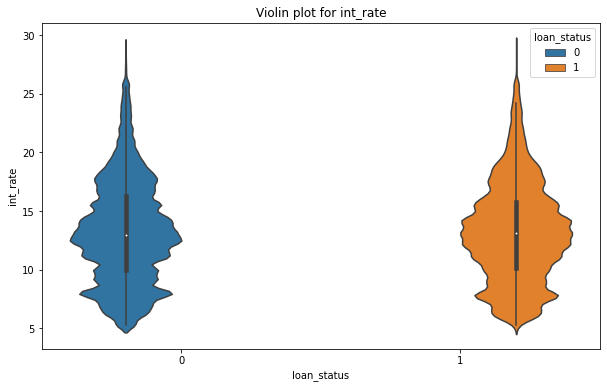

In [47]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x="loan_status", y="int_rate", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for int_rate')
plt.show()

**Interest rate does not impact defaulting of loan**

### grade
grade assigned by the bank

In [48]:
train_data['grade'].unique()

array(['E', 'B', 'A', 'D', 'C', 'F', 'G'], dtype=object)

In [52]:
train_data.groupby(['grade','loan_status']).count()['member_id']

grade  loan_status
A      0               65148
       1               23959
B      0              112507
       1               40206
C      0              115579
       1               31920
D      0               65419
       1               18148
E      0               34553
       1                7942
F      0               10934
       1                2892
G      0                2461
       1                 760
Name: member_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


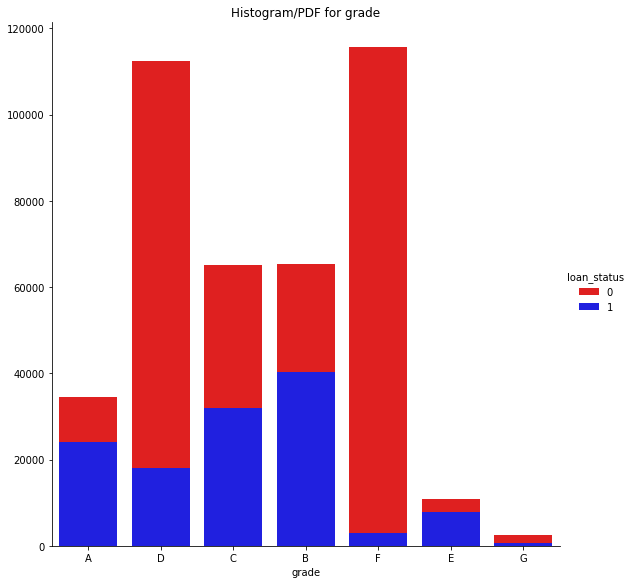

In [53]:
sns.FacetGrid(train_data, hue="loan_status",palette = ['Red','Blue'],size=8) \
   .map(sns.countplot, "grade") \
   .set(title='Histogram/PDF for grade')\
   .add_legend();
plt.show();

**Grade A, B and E have high chance of defaulting while F, D, C and G have low chance of defaulting**

### sub_grade

grade assigned by the bank

In [54]:
train_data['sub_grade'].unique()

array(['E3', 'B4', 'A4', 'D5', 'B2', 'A5', 'B1', 'C4', 'D4', 'C3', 'D2',
       'A3', 'A1', 'C1', 'D1', 'E2', 'B3', 'A2', 'C2', 'C5', 'E4', 'D3',
       'B5', 'F2', 'F5', 'E1', 'E5', 'F4', 'F1', 'F3', 'G4', 'G3', 'G5',
       'G1', 'G2'], dtype=object)

In [55]:
train_data.groupby(['sub_grade','loan_status']).count()['member_id']

sub_grade  loan_status
A1         0              10263
           1               3390
A2         0               9930
           1               3603
A3         0               9969
                          ...  
G3         1                124
G4         0                279
           1                112
G5         0                256
           1                 79
Name: member_id, Length: 70, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


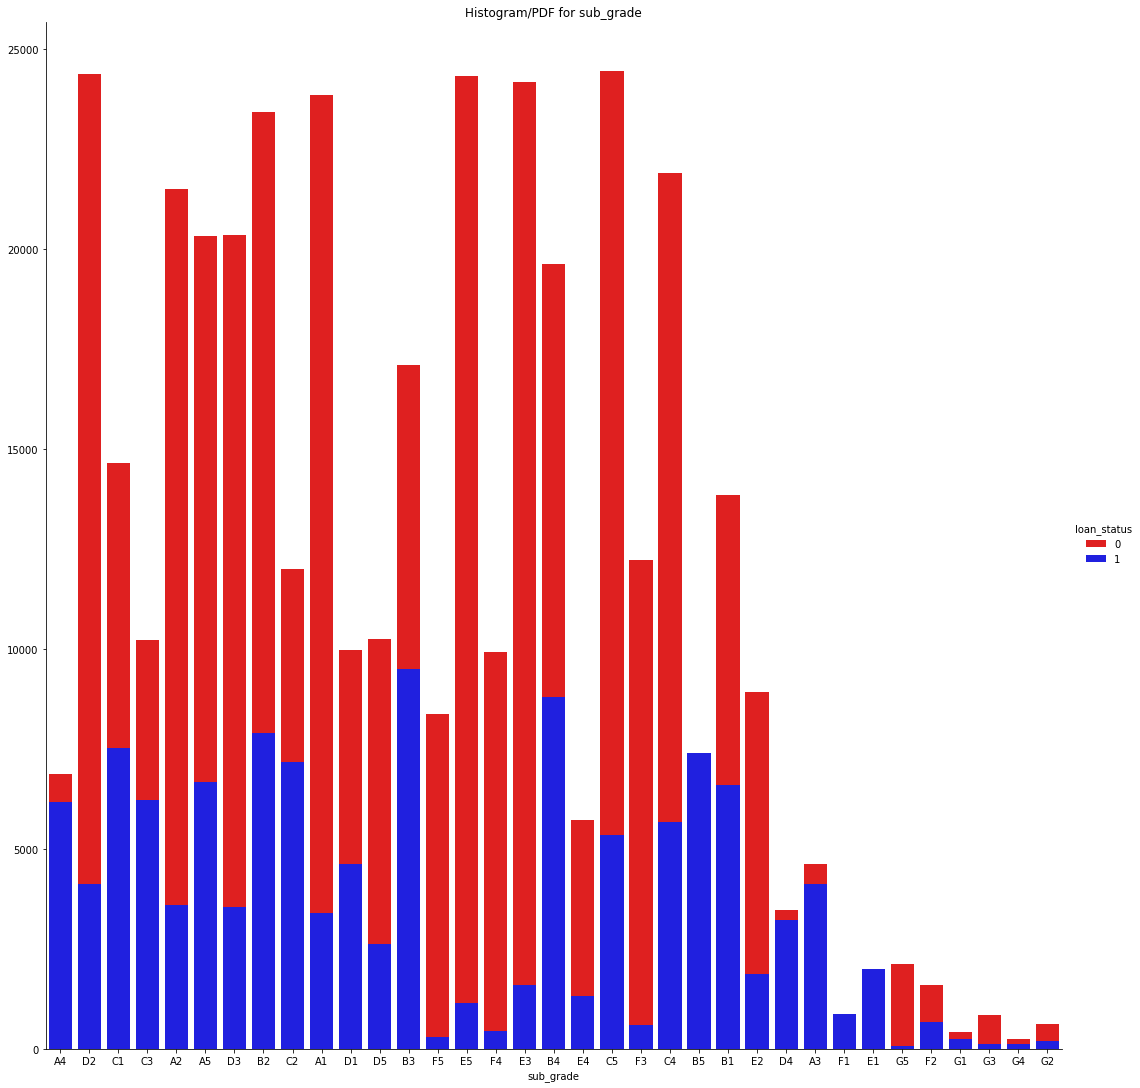

In [59]:
sns.FacetGrid(train_data, hue="loan_status",palette = ['Red','Blue'],size=15) \
   .map(sns.countplot, "sub_grade") \
   .set(title='Histogram/PDF for sub_grade')\
   .add_legend();
plt.show();

**Different sub_grades impact chance of defaulting differently**

### emp_title

job / Employer title of member

In [67]:
train_data['emp_title'].unique().shape

(166685,)

### emp_length

employment length, where 0 means less than
one year and 10 means ten or more years

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


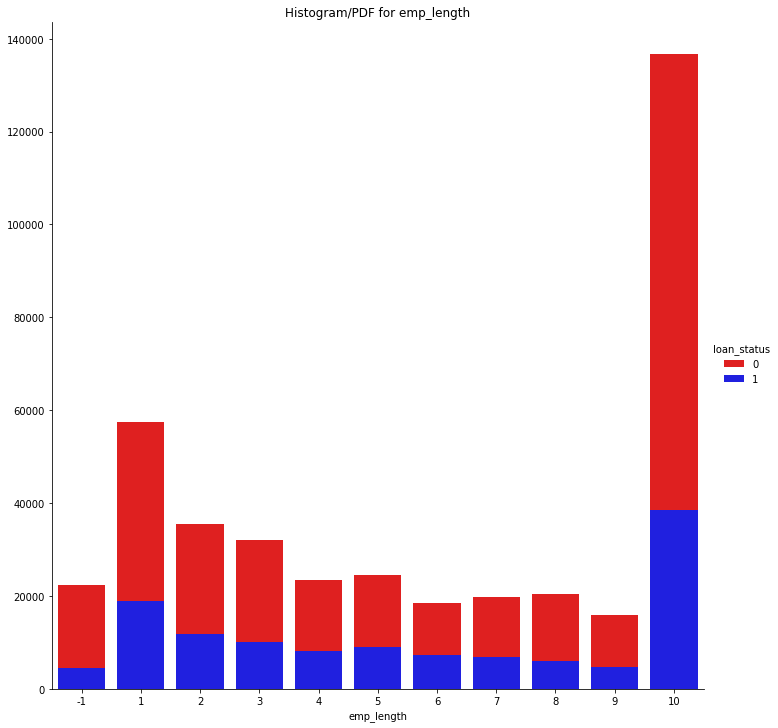

In [84]:
sns.FacetGrid(train_data, hue="loan_status",palette = ['Red','Blue'],size=10) \
   .map(sns.countplot, "emp_length") \
   .set(title='Histogram/PDF for emp_length')\
   .add_legend();
plt.show();

**Higher emp_length leads to lesser chance in loan defaulting**

### home_ownership

status of home ownership

In [100]:
train_data['home_ownership'].unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE', 'ANY'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


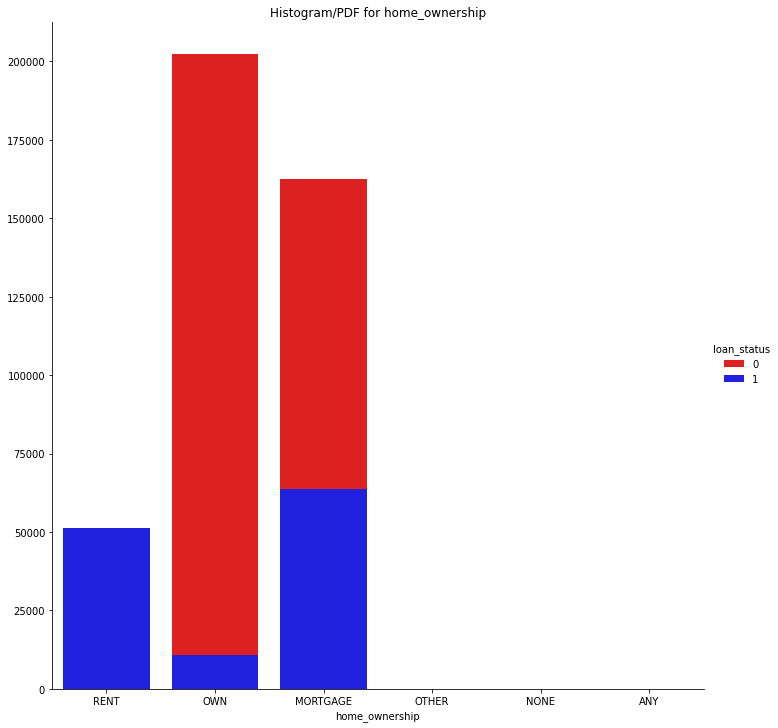

In [85]:
sns.FacetGrid(train_data, hue="loan_status",palette = ['Red','Blue'],size=10) \
   .map(sns.countplot, "home_ownership") \
   .set(title='Histogram/PDF for home_ownership')\
   .add_legend();
plt.show();

**RENT and MORTGAGE have higher chance of loan defaulting than other home_ownership**

### annual_inc

annual income ($) reported by the member

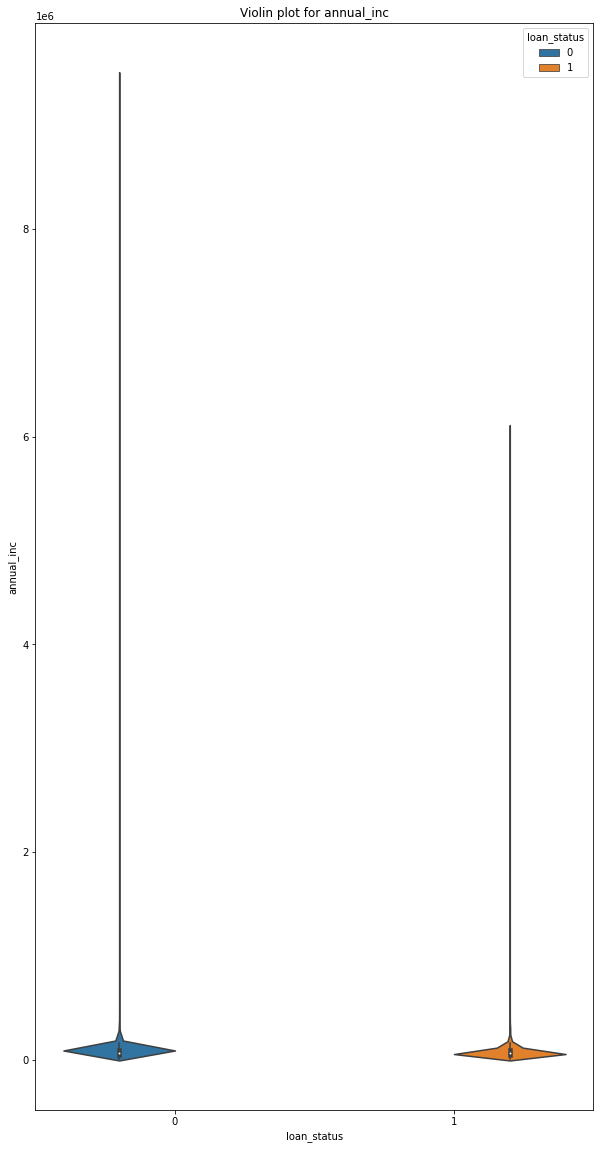

In [89]:
import seaborn as sns
plt.figure(figsize=(10, 20))
sns.violinplot(x="loan_status", y="annual_inc", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for annual_inc')
plt.show()

**A very high income (> 6.5 x 10 ^6) decreases chance of loan defaulting**

### verification_status

status of income verified by the bank

In [101]:
train_data['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


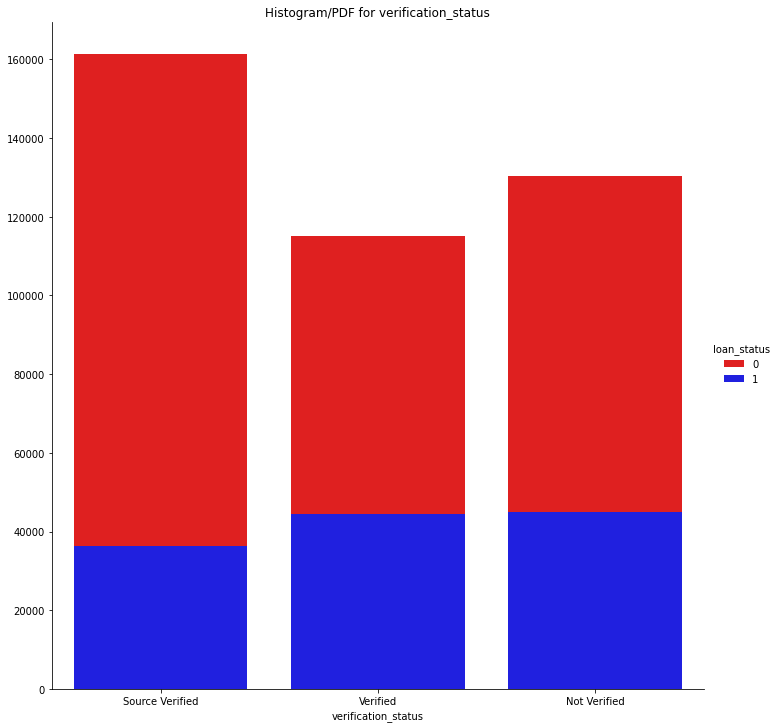

In [90]:
sns.FacetGrid(train_data, hue="loan_status",palette = ['Red','Blue'],size=10) \
   .map(sns.countplot, "verification_status") \
   .set(title='Histogram/PDF for verification_status')\
   .add_legend();
plt.show();

**Source Verified is least likely to default the loan**

### pymnt_plan

indicates if any payment plan has started against loan

In [102]:
train_data['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


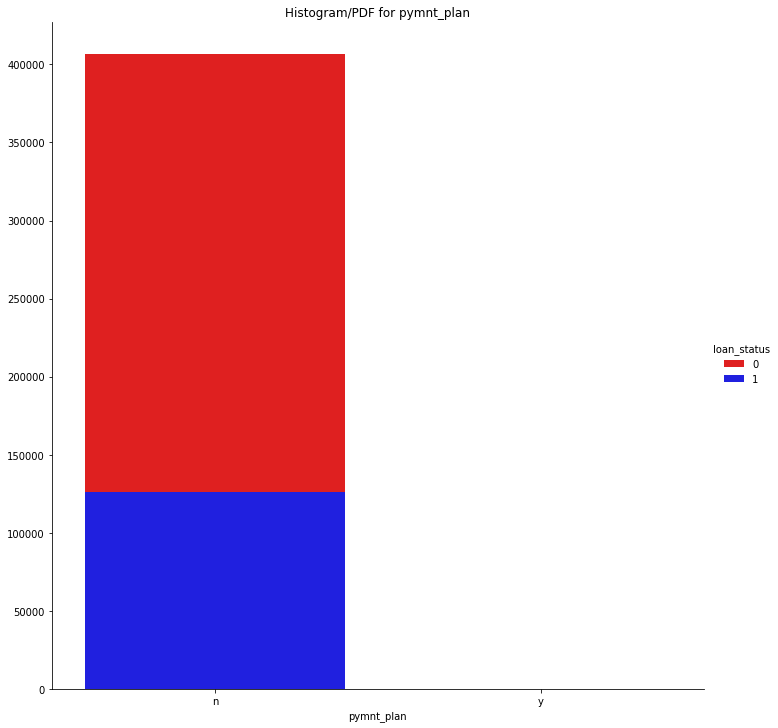

In [92]:
sns.FacetGrid(train_data, hue="loan_status",palette = ['Red','Blue'],size=10) \
   .map(sns.countplot, "pymnt_plan") \
   .set(title='Histogram/PDF for pymnt_plan')\
   .add_legend();
plt.show();

In [93]:
train_data.groupby(['pymnt_plan','loan_status']).count()['member_id']

pymnt_plan  loan_status
n           0              406595
            1              125825
y           0                   6
            1                   2
Name: member_id, dtype: int64

**pymnt_plan does not have much impact on loan default**

### desc

loan description provided by member

In [151]:
list(train_data['desc'].isna()).count(True)/train_data.shape[0]

0.8580108484151848

**More than 85% data for desc is NA, so better to drop it**

### purpose

purpose of loan

In [114]:
train_data['purpose'].unique()

array(['debt_consolidation', 'home_improvement', 'credit_card', 'other',
       'major_purchase', 'small_business', 'vacation', 'car', 'moving',
       'medical', 'wedding', 'renewable_energy', 'house', 'educational'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


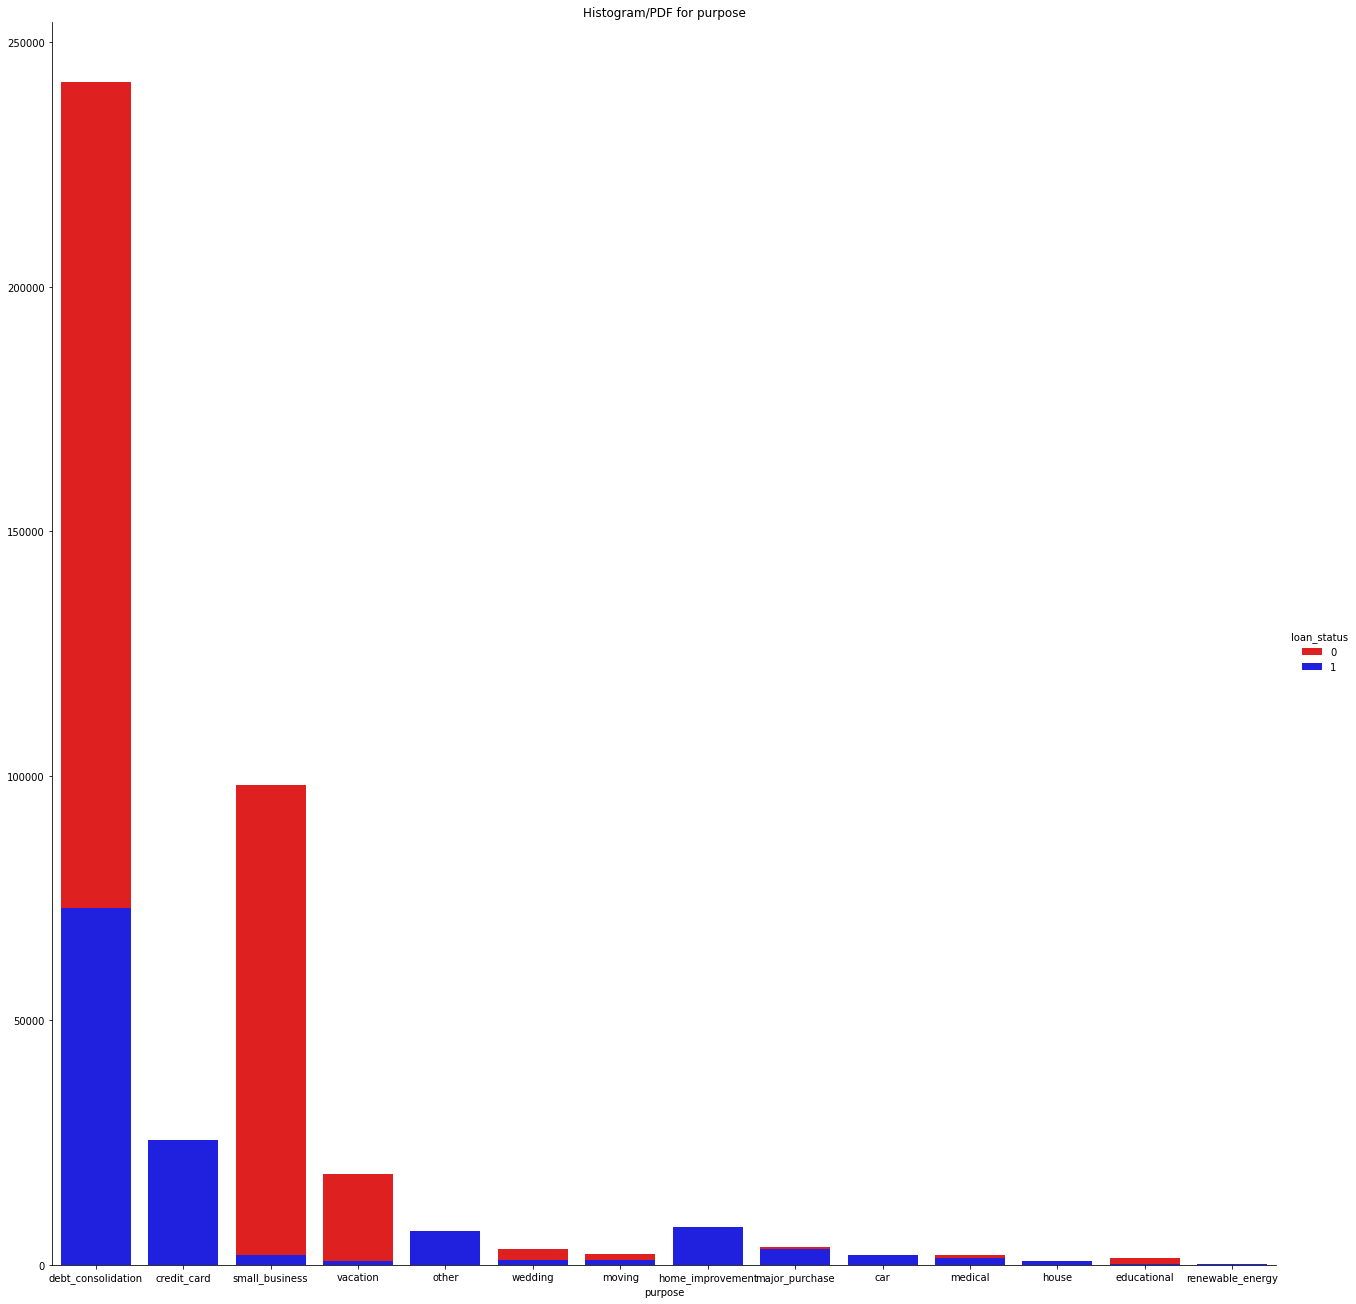

In [104]:
sns.FacetGrid(train_data, hue="loan_status",palette = ['Red','Blue'],size=18) \
   .map(sns.countplot, "purpose") \
   .set(title='Histogram/PDF for purpose')\
   .add_legend();
plt.show();

**debt_consolidation, credit_card, home_improvement, major_purcharse, car, medical and other category of purspose have higher chance of laon default**

### zip_code

first three digits of area zipcode of member

In [110]:
train_data.groupby(['zip_code','loan_status']).count()['member_id']

zip_code  loan_status
7         0                2
8         0                2
          1                1
10        0              678
          1              218
                        ... 
997       1               58
998       0               75
          1               30
999       0               29
          1                7
Name: member_id, Length: 1774, dtype: int64

### addr_state

living state of member

In [111]:
train_data['addr_state'].unique()

array(['FL', 'MD', 'OH', 'VA', 'CA', 'IN', 'AL', 'KY', 'NM', 'TN', 'TX',
       'PA', 'KS', 'IL', 'NY', 'MO', 'NC', 'NJ', 'CT', 'NH', 'MI', 'AZ',
       'GA', 'UT', 'OK', 'NV', 'MN', 'VT', 'MA', 'DE', 'LA', 'WA', 'AR',
       'CO', 'WV', 'HI', 'WI', 'SD', 'NE', 'RI', 'WY', 'SC', 'AK', 'MS',
       'MT', 'OR', 'ME', 'DC', 'ND', 'IA', 'ID'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


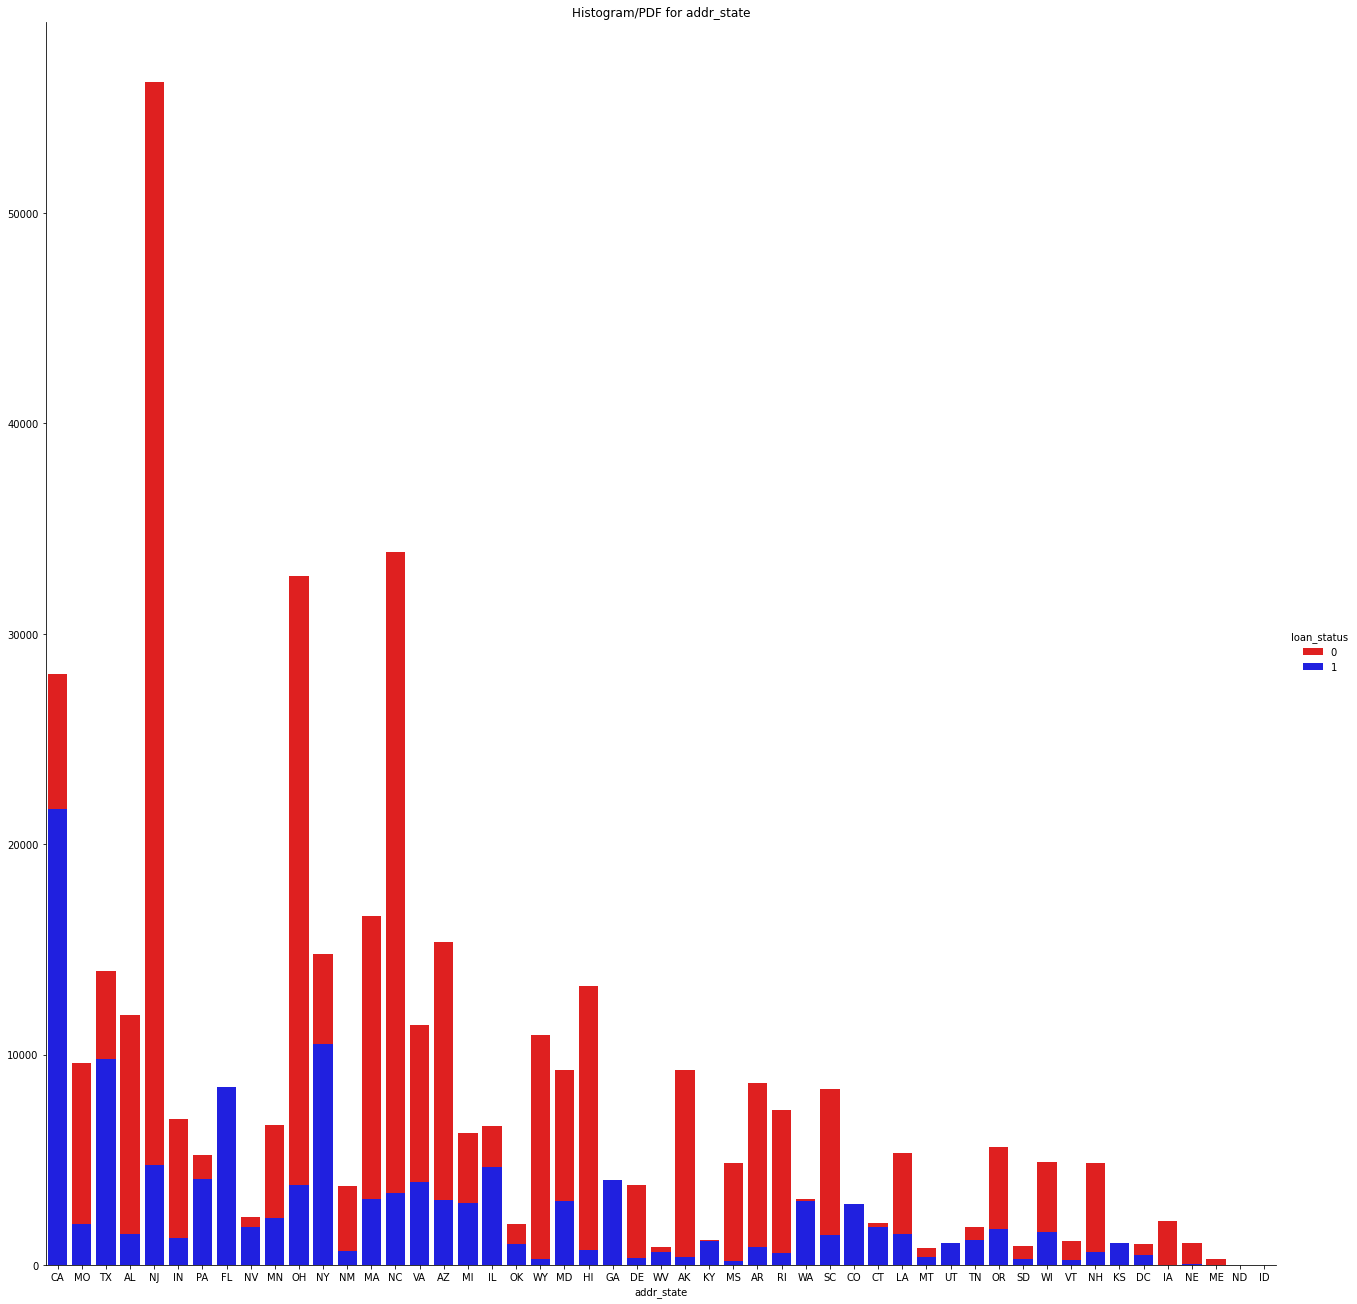

In [112]:
sns.FacetGrid(train_data, hue="loan_status",palette = ['Red','Blue'],size=18) \
   .map(sns.countplot, "addr_state") \
   .set(title='Histogram/PDF for addr_state')\
   .add_legend();
plt.show();

**Some states have higher chance loan default than others**

### dti

ratio of member's total monthly debt
repayment excluding mortgage divided by self
reported monthly income

In [103]:
train_data['dti'].unique()

array([33.88,  3.64, 18.42, ..., 45.77, 41.94, 59.18])

In [116]:
train_data['dti'].isna().any()

False

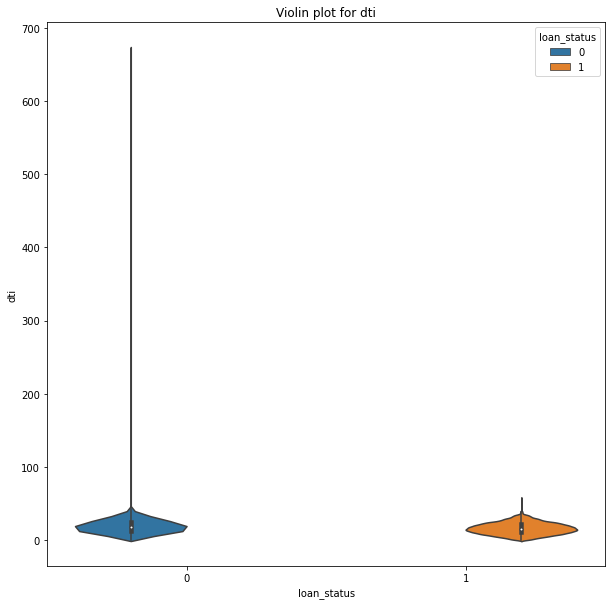

In [116]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.violinplot(x="loan_status", y="dti", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for dti')
plt.show()

**dti value greater than 100 makes it highly unlikely to default**

### delinq_2yrs

number of 30+ days delinquency in past 2 years

In [120]:
train_data['delinq_2yrs'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  5., 13.,  6., 10.,  9., 11., 14.,  7.,
        8., 12., 18., 19., 15., 27., 16., nan, 24., 30., 21., 17., 26.,
       22.])

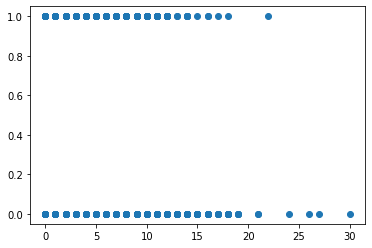

In [124]:
import matplotlib.pyplot as plt

plt.scatter(train_data['delinq_2yrs'],train_data['loan_status'])
plt.show()

**delinq_2yrs of more than 20 has low chance of loan default**

### inq_last_6mths

number of inquiries in last 6 months

In [125]:
train_data['inq_last_6mths'].unique()

array([ 1.,  0.,  2.,  5.,  3.,  4.,  6.,  7., 11.,  8.,  9., 10., 12.,
       28., 17., 14., 24., nan, 15., 20., 16., 13., 31., 18.])

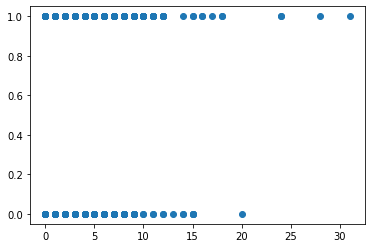

In [126]:
import matplotlib.pyplot as plt

plt.scatter(train_data['inq_last_6mths'],train_data['loan_status'])
plt.show()

**inq_last_6mths of  20 and more has high chance of loan default**

### mths_since_last_delinq

number of months since last delinq

In [127]:
train_data['mths_since_last_delinq'].unique()

array([ 50.,  nan,  46.,  56.,  77.,  52.,  82.,  72.,  11.,  18.,  28.,
        20.,  73.,  33.,  23.,  25.,   6.,  13.,  26.,  41.,  19.,  22.,
         4.,  36.,  51.,  44.,  75.,  16.,  47.,  14.,   9.,  32.,  63.,
        15.,   1.,  59.,  37.,  43.,  29.,   3.,  58.,  12.,   8.,  27.,
        74.,  17.,  53.,  64.,   5.,  81.,  49.,   2.,  62.,  30.,  55.,
        34.,  68.,  38.,  48.,  60.,  45.,  39.,  78.,  21.,  24.,  61.,
        54.,  65.,  80.,  67.,   7.,  31.,  70.,  66.,  76.,  40.,  57.,
        79.,  42.,  10.,  71.,   0.,  35.,  69., 136., 100.,  93.,  91.,
       121.,  89.,  85., 108.,  87., 129.,  90.,  88., 112.,  83., 119.,
        99.,  84., 102., 101., 104.,  92., 122., 103., 126.,  97.,  86.,
       113.,  98., 115., 116., 176., 142.,  95., 120., 118.,  96., 151.,
       170.,  94., 134., 148., 124., 114., 152., 110., 106., 131., 180.,
       133., 146., 105., 111., 117., 127., 159., 154., 123., 141., 135.,
       109., 107., 130., 171., 143.])

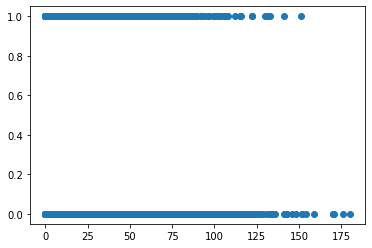

In [128]:
import matplotlib.pyplot as plt

plt.scatter(train_data['mths_since_last_delinq'],train_data['loan_status'])
plt.show()

**More than 150 value of mths_since_last_delinq has very less chance of loan default**

### mths_since_last_record

number of months since last public record

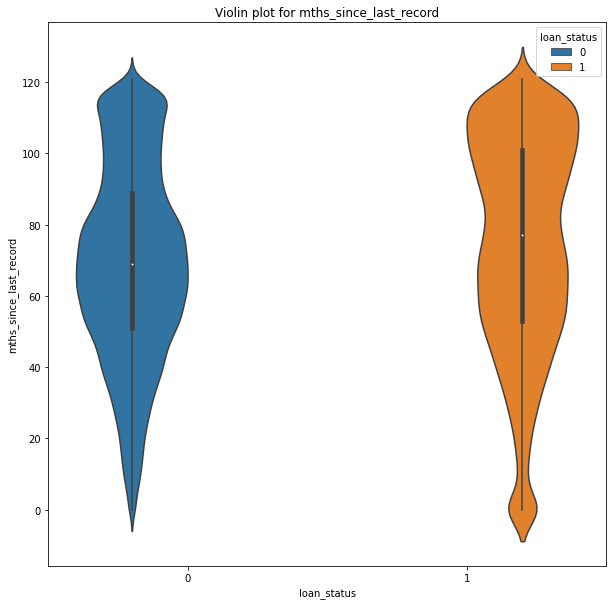

In [131]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.violinplot(x="loan_status", y="mths_since_last_record", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for mths_since_last_record')
plt.show()

**Value close to 0 and high value (> 80) of mths_since_last_record has higher chance of loan default**

### open_acc

number of open credit line in member's credit line

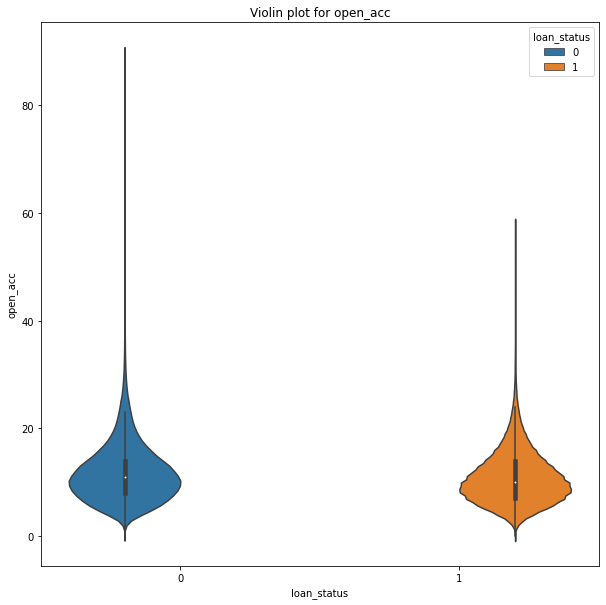

In [133]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.violinplot(x="loan_status", y="open_acc", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for open_acc')
plt.show()

**open_acc value of greater than 60 has very less chance of loan default**

### pub_rec

number of derogatory public records

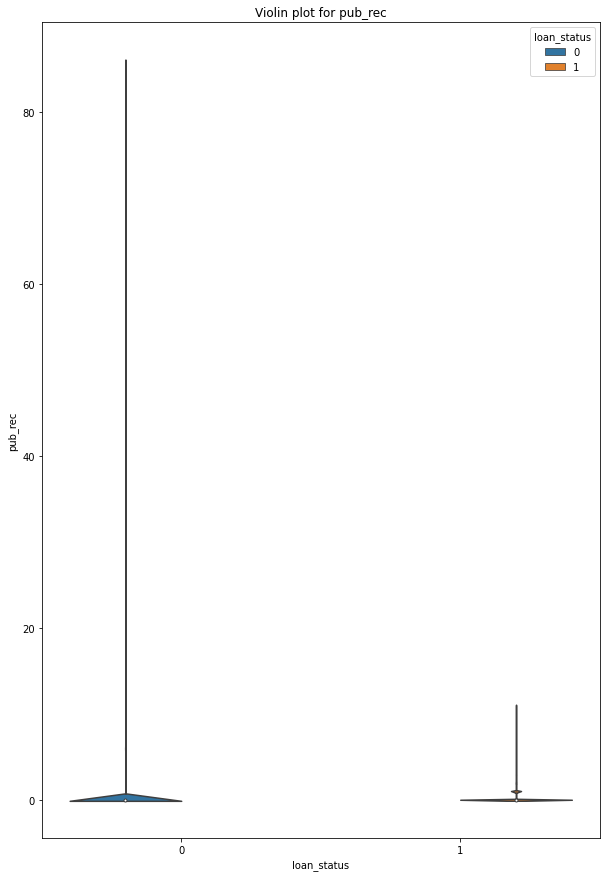

In [137]:
import seaborn as sns
plt.figure(figsize=(10, 15))
sns.violinplot(x="loan_status", y="pub_rec", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for pub_rec')
plt.show()

**More than 15 pub_rec leads to less likely loan defaulting**

### revol_bal

total credit revolving balance

In [117]:
train_data['revol_bal'].isna().any()

False

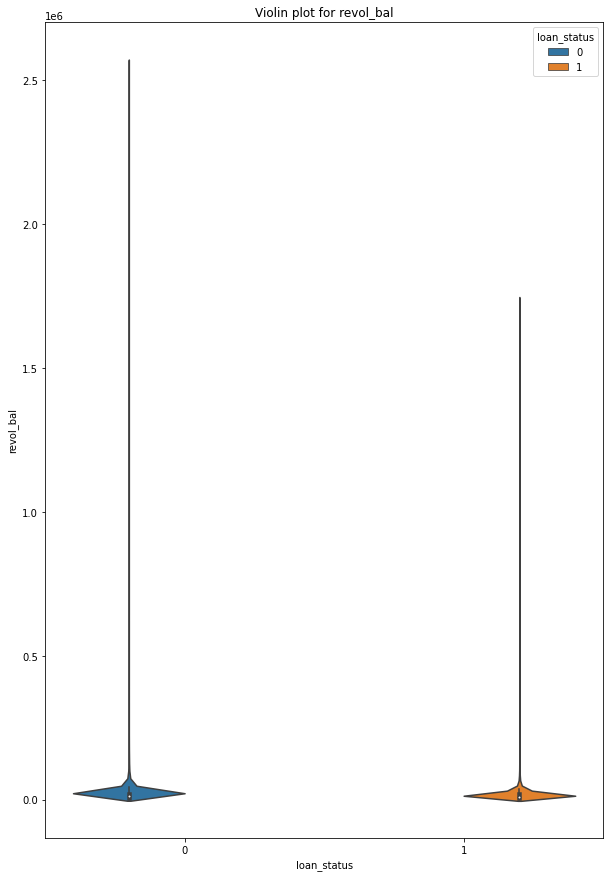

In [138]:
import seaborn as sns
plt.figure(figsize=(10, 15))
sns.violinplot(x="loan_status", y="revol_bal", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for revol_bal')
plt.show()

**More than 1.75 x 10 ^6 value of revol_bal leads to less likely loan default**

### revol_util

amount of credit a member is using relative to revol_bal

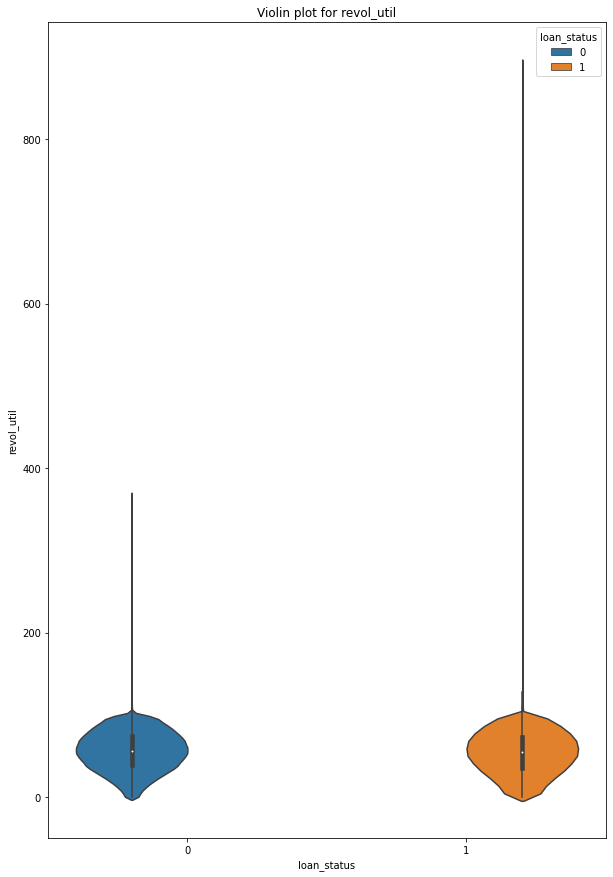

In [139]:
import seaborn as sns
plt.figure(figsize=(10, 15))
sns.violinplot(x="loan_status", y="revol_util", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for revol_util')
plt.show()

**Greater than 400 value of revol_util leads to high chances of loan default**

### total_acc

total number of credit lines available in members credit line

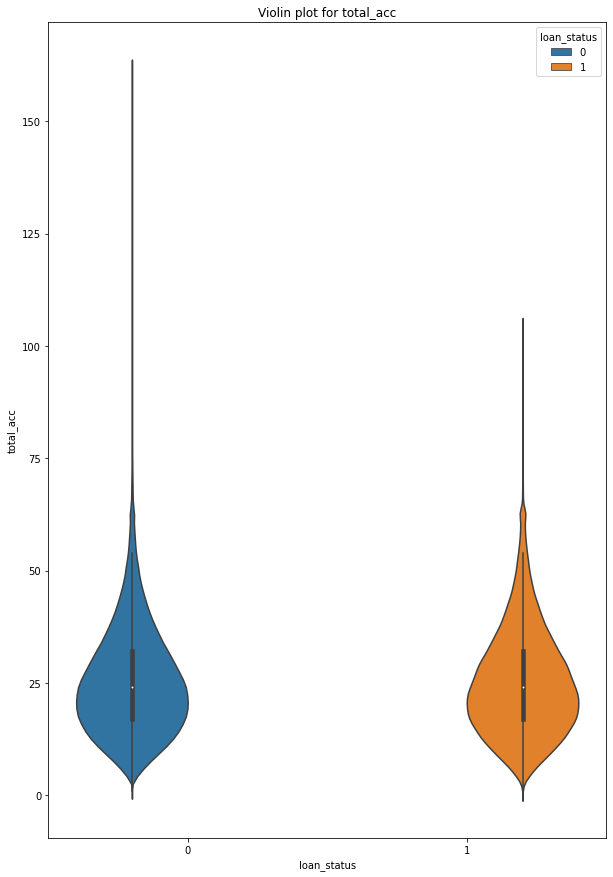

In [140]:
import seaborn as sns
plt.figure(figsize=(10, 15))
sns.violinplot(x="loan_status", y="total_acc", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for total_acc')
plt.show()

**More than 110 value of total_acc leads to less likely loan default**

### initial_list_status

unique listing status of the loan - W(Waiting), F(Forwarded)

In [119]:
train_data['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


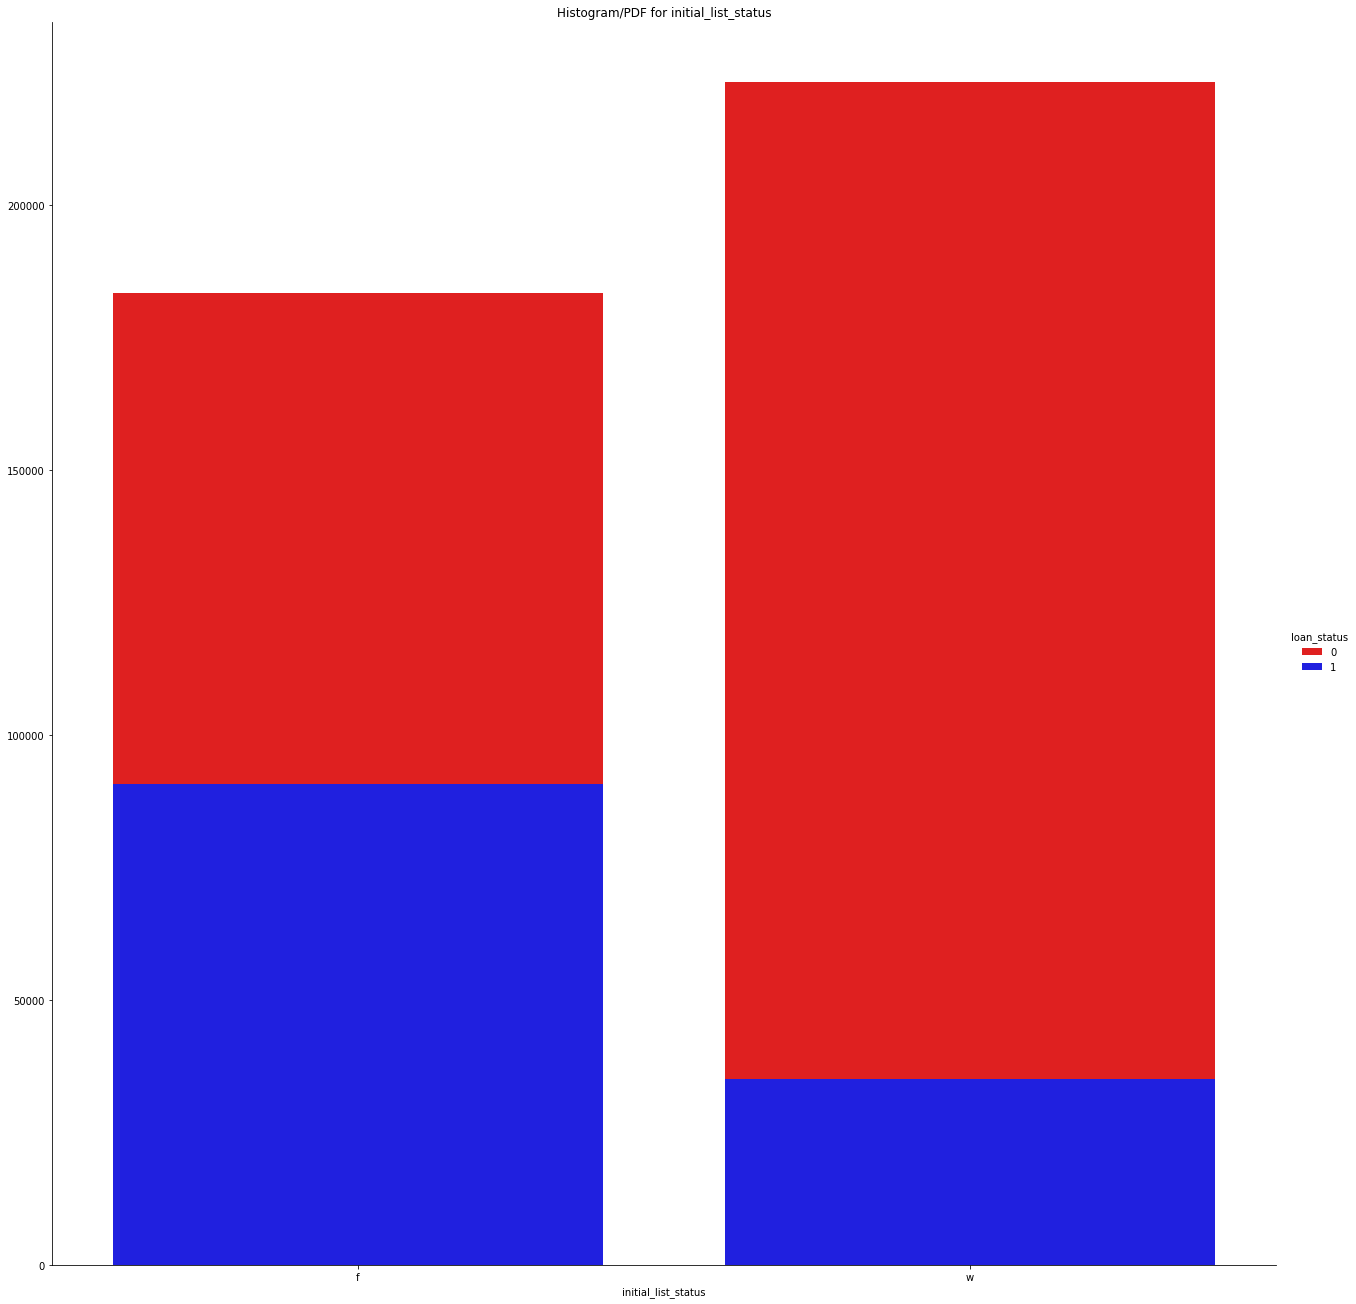

In [141]:
sns.FacetGrid(train_data, hue="loan_status",palette = ['Red','Blue'],size=18) \
   .map(sns.countplot, "initial_list_status") \
   .set(title='Histogram/PDF for initial_list_status')\
   .add_legend();
plt.show();

**initial_list_status of "f" is more likley to default than "w"**

### total_rec_int

interest received till date

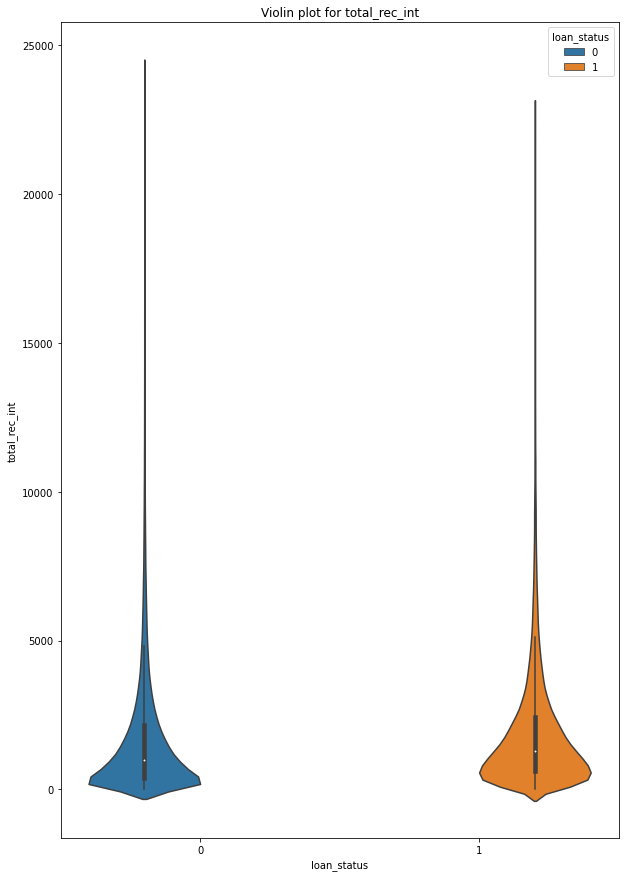

In [142]:
import seaborn as sns
plt.figure(figsize=(10, 15))
sns.violinplot(x="loan_status", y="total_rec_int", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for total_rec_int')
plt.show()

**total_rec_int does not impact loan status**

### total_rec_late_fee

Late fee received till date

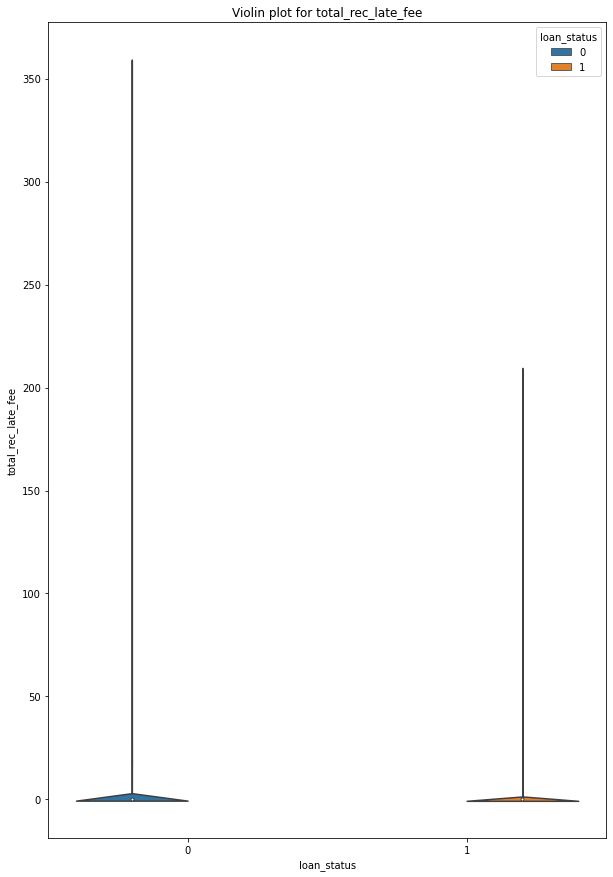

In [143]:
import seaborn as sns
plt.figure(figsize=(10, 15))
sns.violinplot(x="loan_status", y="total_rec_late_fee", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for total_rec_late_fee')
plt.show()

**More than 225 value of total_rec_late_fee leads to less likely loan default**

### recoveries

post charge off gross recovery

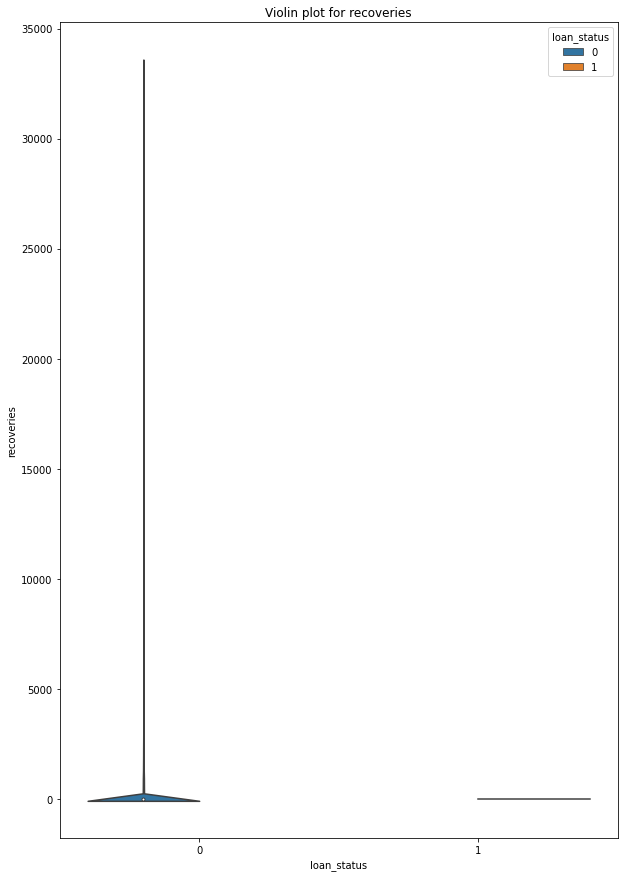

In [144]:
import seaborn as sns
plt.figure(figsize=(10, 15))
sns.violinplot(x="loan_status", y="recoveries", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for recoveries')
plt.show()

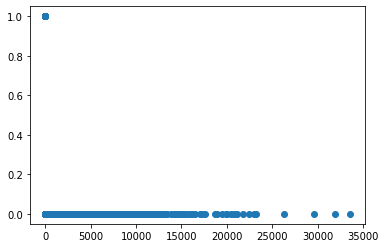

In [145]:
import matplotlib.pyplot as plt

plt.scatter(train_data['recoveries'],train_data['loan_status'])
plt.show()

**Any value of recovery leads to less likely chance of defaulting**

### collection_recovery_fee

post charge off collection fee

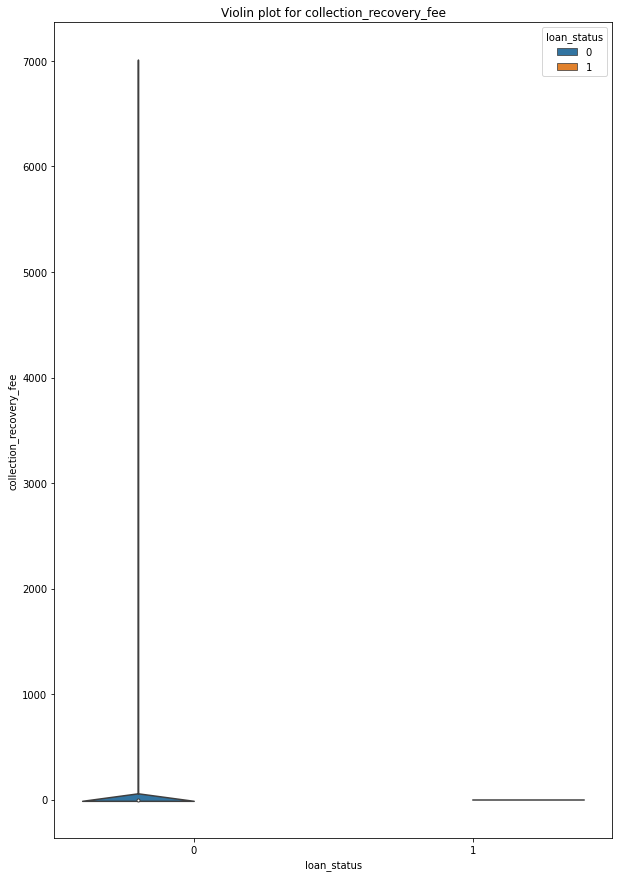

In [146]:
import seaborn as sns
plt.figure(figsize=(10, 15))
sns.violinplot(x="loan_status", y="collection_recovery_fee", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for collection_recovery_fee')
plt.show()

**Any value of collection_recovery_fee leads to less likely chance of defaulting**

### collections_12_mths_ex_med

number of collections in last 12 months
excluding medical collections

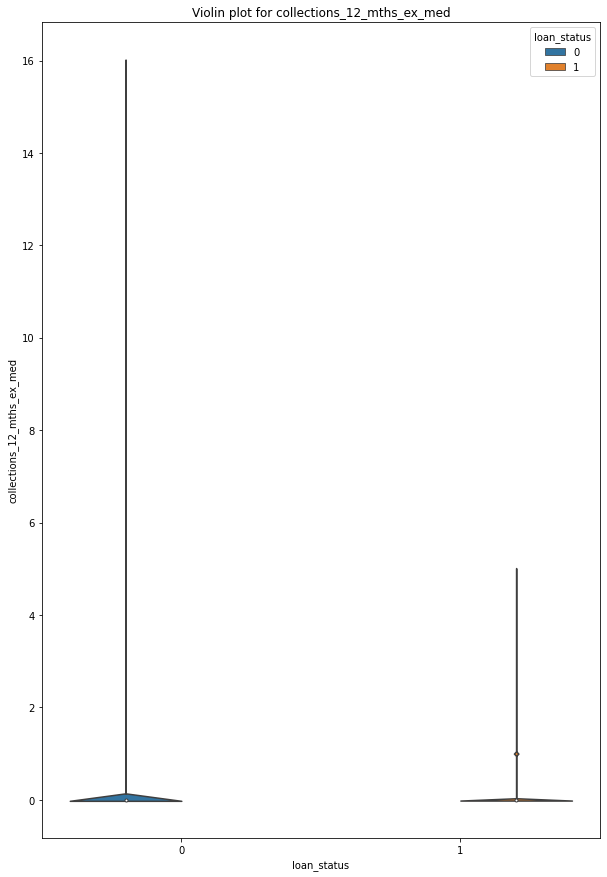

In [147]:
import seaborn as sns
plt.figure(figsize=(10, 15))
sns.violinplot(x="loan_status", y="collections_12_mths_ex_med", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for collections_12_mths_ex_med')
plt.show()

**A value of more than 5 for collections_12_mths_ex_med leds to less likely chance of defaulting**

### mths_since_last_major_derog

months since most recent 90 day or worse rating

In [149]:
list(train_data['mths_since_last_major_derog'].isna()).count(True)/train_data.shape[0]

0.7502385299045129

**More than 75% data for mths_since_last_major_derog is NA, so better to drop it**

### application_type

indicates when the member is an individual or joint

In [153]:
train_data.groupby(['application_type','loan_status']).count()['member_id']

application_type  loan_status
INDIVIDUAL        0              406297
                  1              125826
JOINT             0                 304
                  1                   1
Name: member_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


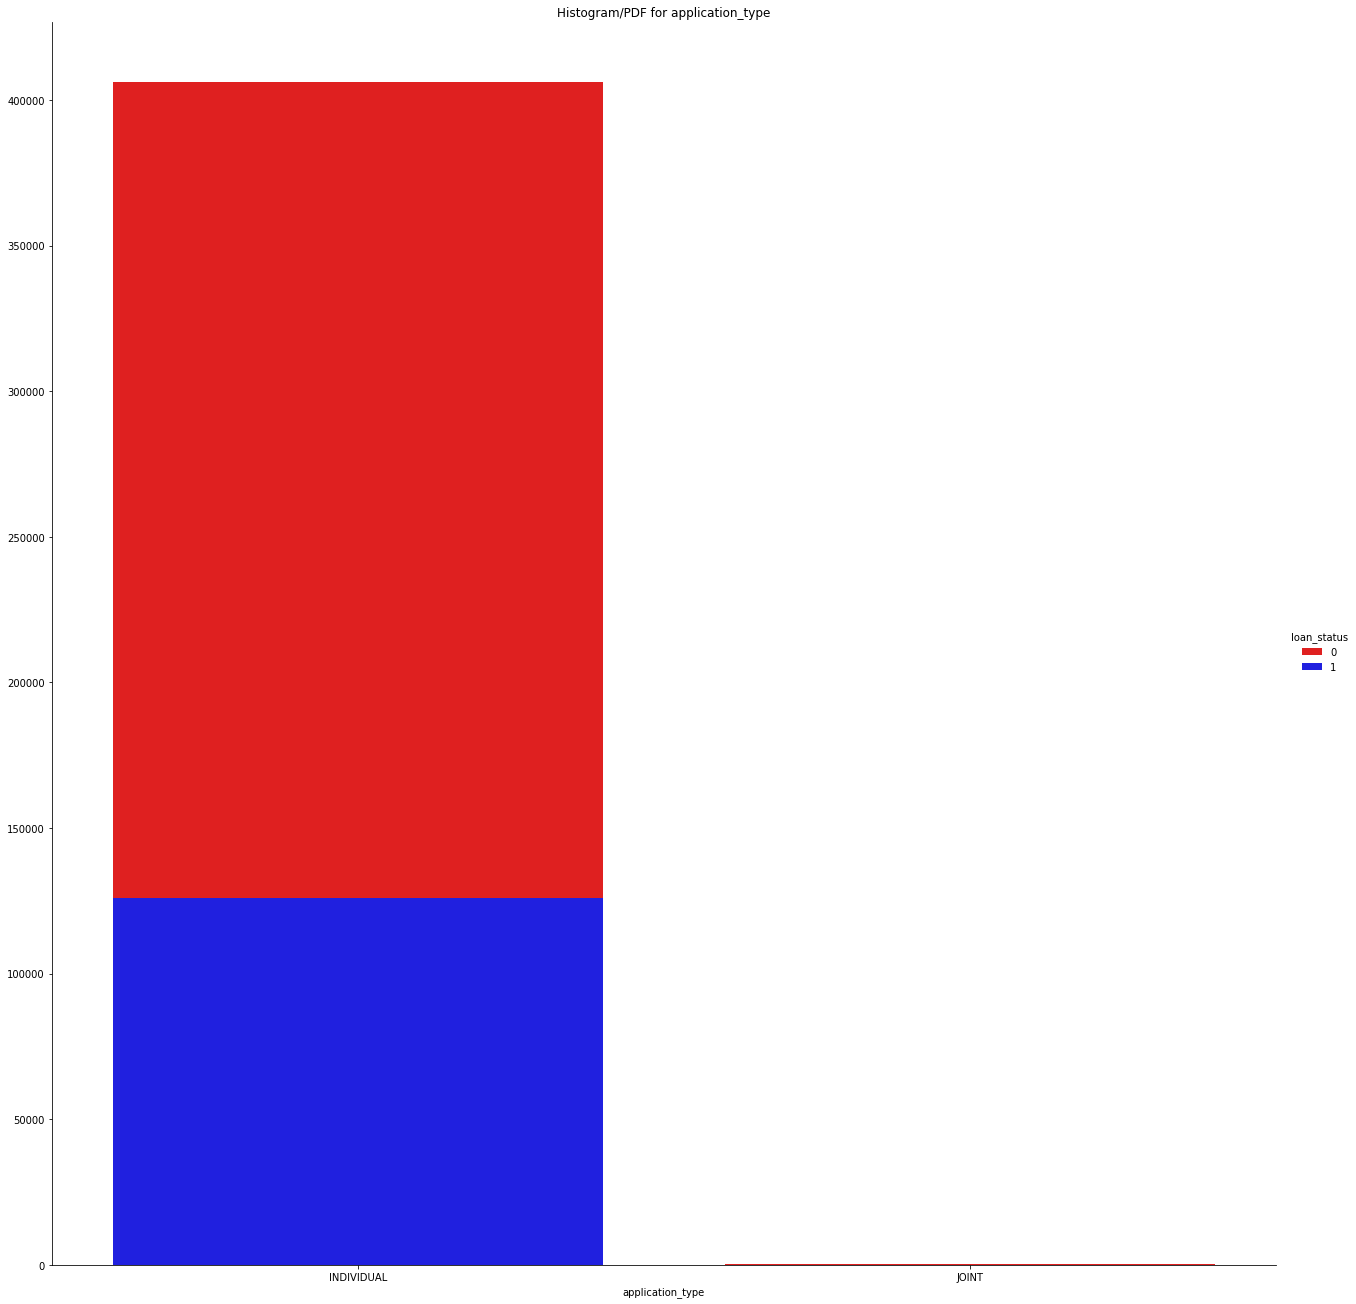

In [152]:
sns.FacetGrid(train_data, hue="loan_status",palette = ['Red','Blue'],size=18) \
   .map(sns.countplot, "application_type") \
   .set(title='Histogram/PDF for application_type')\
   .add_legend();
plt.show();

**Joint application_type is extremly unlikely to default**

### verification_status_joint

indicates if the joint members income was verified by the bank

In [155]:
train_data['verification_status_joint'].unique()

array([nan, 'Verified', 'Not Verified', 'Source Verified'], dtype=object)

In [157]:
list(train_data['verification_status_joint'].isna()).count(True)/train_data.shape[0]

0.9994271525915241

**More than 99 % of data is missing, so better to drop the feature**

### last_week_pay

indicates how long (in weeks) a member has paid EMI after batch enrolled

In [107]:
train_data['last_week_pay'].unique()

array([ 26.,   9., 135.,  96., 113., 117.,  78.,  44.,  52.,  95.,  48.,
        82.,  35., 104.,  17.,  13.,  nan,  31.,  30.,  70.,   4.,  91.,
        65.,  39.,  83.,  74.,  22.,  61., 156., 122., 174.,  87., 139.,
         0.,  57., 131., 152.,  43., 161.,  56., 170., 157., 109., 126.,
       100., 148., 265., 165., 261., 213., 222., 196., 130., 144., 244.,
       204.,  69., 217., 143., 191.,  21., 226.,  18., 108.,  79., 183.,
       178., 187., 252., 200., 118.,  92., 121., 209., 239., 248., 169.,
       153., 235., 256.,   8., 182., 230., 231., 257., 243., 205., 192.,
       270., 218., 283., 300., 221., 291., 278., 274., 269., 304.])

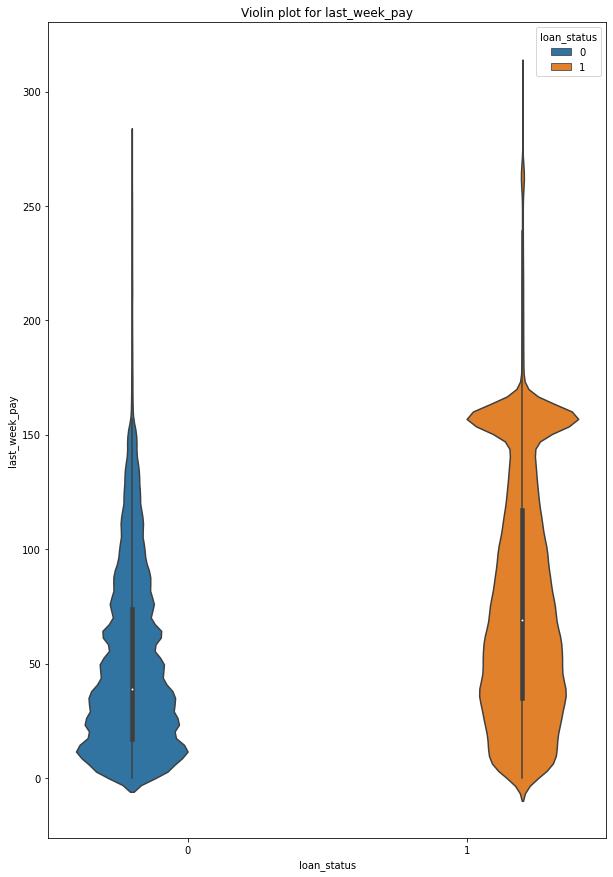

In [171]:
import seaborn as sns
plt.figure(figsize=(10, 15))
sns.violinplot(x="loan_status", y="last_week_pay", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for last_week_pay')
plt.show()

**last_week_pay in between 150 to 175 has high chance of defaulting**

### acc_now_delinq

number of accounts on which the member is delinquent

In [175]:
train_data.groupby(['acc_now_delinq','loan_status']).count()['member_id']

acc_now_delinq  loan_status
0.0             0              404485
                1              125464
1.0             0                1972
                1                 332
2.0             0                 118
                1                  16
3.0             0                  16
4.0             0                   4
                1                   1
5.0             0                   1
                1                   1
6.0             0                   1
14.0            0                   1
Name: member_id, dtype: int64

**As acc_now_delinq increases chances of loan defaulting decreases**

### tot_coll_amt

total collection amount ever owed

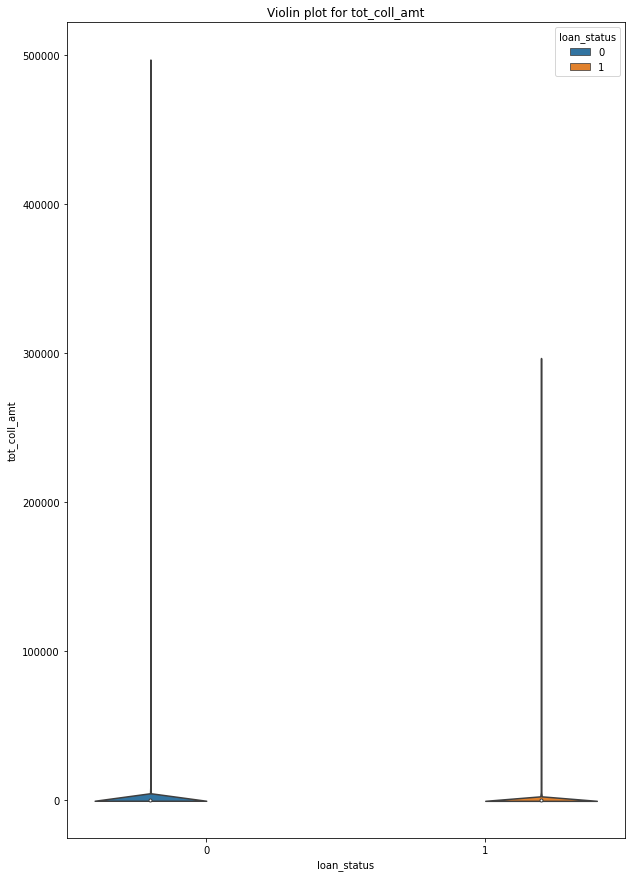

In [176]:
import seaborn as sns
plt.figure(figsize=(10, 15))
sns.violinplot(x="loan_status", y="tot_coll_amt", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for tot_coll_amt')
plt.show()

**tot_coll_amt value of more than 300000 leads to less likely chance of default**

### tot_cur_bal
total current balance of all accounts



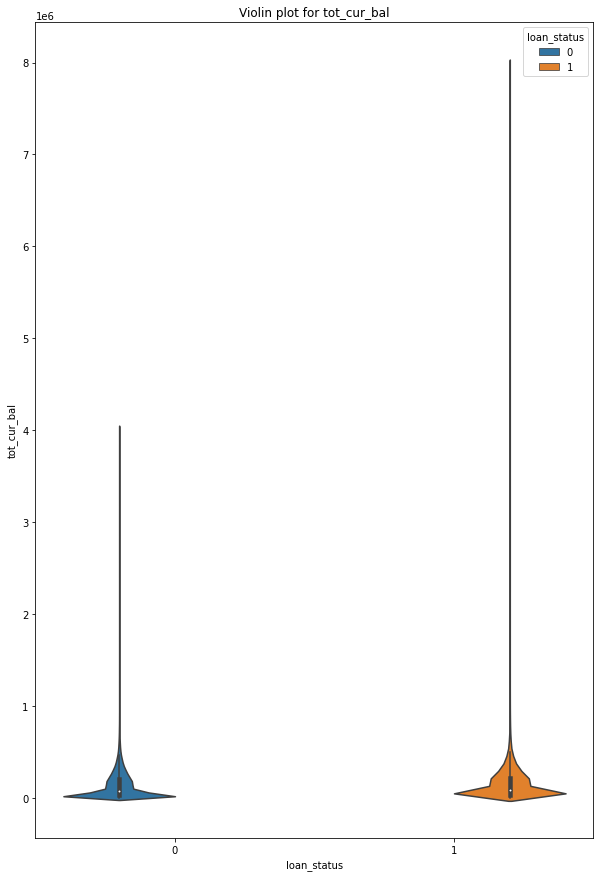

In [177]:
import seaborn as sns
plt.figure(figsize=(10, 15))
sns.violinplot(x="loan_status", y="tot_cur_bal", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for tot_cur_bal')
plt.show()

**tot_cur_bal of more than 4 x 10^6 has high chance of defaulting**

### total_rev_hi_lim

total revolving credit limit

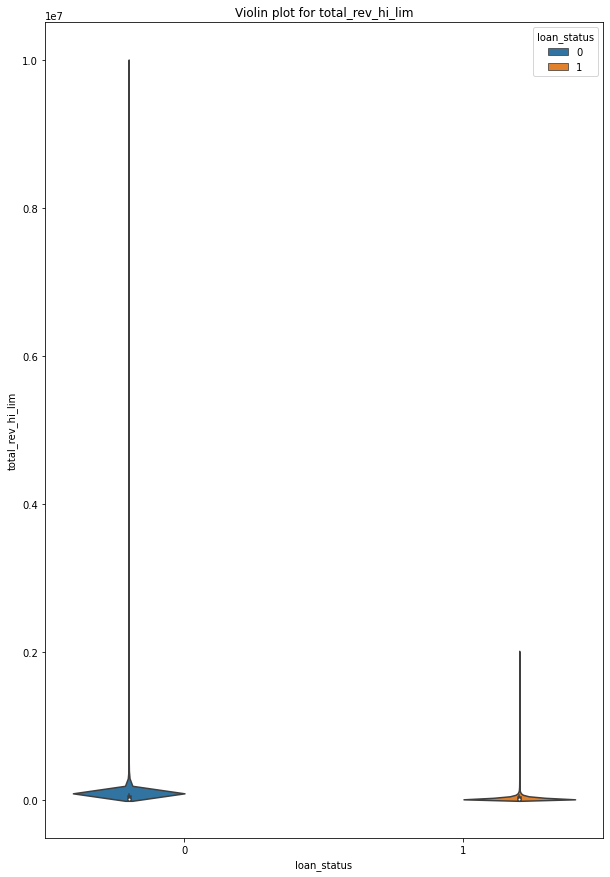

In [178]:
import seaborn as sns
plt.figure(figsize=(10, 15))
sns.violinplot(x="loan_status", y="total_rev_hi_lim", data=train_data, size=8,hue='loan_status')\
   .set(title='Violin plot for total_rev_hi_lim')
plt.show()

**total_rev_hi_lim of value more than 2 x 10^6 leads to less likely loan default**

# DATA TRANSFORMATION

## HANDLING MISSING VALUES

In [35]:
train_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,505537.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,532412.000000,532412.000000,5.324280e+05,532141.000000,532412.000000,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,521814.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05
mean,14757.595722,14744.271291,14704.926696,43.195790,13.242969,6.094139,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,11.545594,0.194858,1.692128e+04,55.057189,25.267357,1753.428788,0.394954,45.717832,4.859221,0.014299,44.121462,58.099553,0.005015,213.562222,1.395541e+05,3.208057e+04
std,8434.420080,8429.139277,8441.290381,10.996354,4.379611,3.536576,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,5.311442,0.583822,2.242322e+04,23.853436,11.843211,2093.199837,4.091546,409.647467,63.123361,0.133005,22.198410,44.317424,0.079117,1958.571538,1.539149e+05,3.805304e+04
min,500.000000,500.000000,0.000000,36.000000,5.320000,1.000000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,36.000000,9.990000,3.000000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.444000e+03,37.700000,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,27.000000,22.000000,0.000000,0.000000,2.983975e+04,1.400000e+04
50%,13000.000000,13000.000000,13000.000000,36.000000,12.990000,6.000000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187600e+04,56.000000,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,44.000000,48.000000,0.000000,0.000000,8.066950e+04,2.370000e+04
75%,20000.000000,20000.000000,20000.000000,60.000000,16.200000,10.000000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.084300e+04,73.600000,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,61.000000,83.000000,0.000000,0.000000,2.084792e+05,3.980000e+04
max,35000.000000,35000.000000,35000.000000,60.000000,28.990000,10.000000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,180.000000,304.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06


In [36]:
train_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'desc', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [37]:
isna_values = train_data.isna().any()

In [38]:
for i in range(len(train_data.columns)):
  if isna_values[i]:
    print(train_data.columns[i]," ",list(train_data[train_data.columns[i]].isna()).count(True)/train_data.shape[0])

emp_length   0.05050635954532819
annual_inc   5.634564673533323e-06
desc   0.8580108484151848
delinq_2yrs   3.0051011592177722e-05
inq_last_6mths   3.0051011592177722e-05
mths_since_last_delinq   0.5119077133434005
mths_since_last_record   0.8457575484384743
open_acc   3.0051011592177722e-05
pub_rec   3.0051011592177722e-05
revol_util   0.0005390400204346879
total_acc   3.0051011592177722e-05
collections_12_mths_ex_med   0.0001784278813285552
mths_since_last_major_derog   0.7502385299045129
verification_status_joint   0.9994271525915241
last_week_pay   0.019935089814960897
acc_now_delinq   3.0051011592177722e-05
tot_coll_amt   0.07889141818236456
tot_cur_bal   0.07889141818236456
total_rev_hi_lim   0.07889141818236456


In [8]:
# Dropping columns with more than 50% values missing
train_data = train_data.drop(columns = ['desc',
                                        'mths_since_last_delinq',
                                        'mths_since_last_record',
                                        'mths_since_last_major_derog',
                                        'verification_status_joint'])

In [39]:
# Dropping columns with more than 50% values missing
test_data = test_data.drop(columns = [  'desc',
                                        'mths_since_last_delinq',
                                        'mths_since_last_record',
                                        'mths_since_last_major_derog',
                                        'verification_status_joint'])

In [9]:
train_data['emp_length'] = train_data['emp_length'].fillna(train_data['emp_length'].median())
train_data['annual_inc'] = train_data['annual_inc'].fillna(train_data['annual_inc'].mean())
train_data['delinq_2yrs'] = train_data['delinq_2yrs'].fillna(train_data['delinq_2yrs'].median())
train_data['inq_last_6mths'] = train_data['inq_last_6mths'].fillna(train_data['inq_last_6mths'].median())
train_data['open_acc'] = train_data['open_acc'].fillna(train_data['open_acc'].median())
train_data['pub_rec'] = train_data['pub_rec'].fillna(train_data['pub_rec'].median())
train_data['revol_util'] = train_data['revol_util'].fillna(train_data['revol_util'].median())
train_data['total_acc'] = train_data['total_acc'].fillna(train_data['total_acc'].median())
train_data['collections_12_mths_ex_med'] = train_data['collections_12_mths_ex_med'].fillna(train_data['collections_12_mths_ex_med'].median())
train_data['acc_now_delinq'] = train_data['acc_now_delinq'].fillna(train_data['acc_now_delinq'].median())
train_data['last_week_pay'] = train_data['last_week_pay'].fillna(train_data['last_week_pay'].median())
train_data['tot_coll_amt'] = train_data['tot_coll_amt'].fillna(train_data['tot_coll_amt'].mean())
train_data['tot_cur_bal'] = train_data['tot_cur_bal'].fillna(train_data['tot_cur_bal'].mean())
train_data['total_rev_hi_lim'] = train_data['total_rev_hi_lim'].fillna(train_data['total_rev_hi_lim'].mean())

In [ ]:
test_data['emp_length'] = test_data['emp_length'].fillna(train_data['emp_length'].median())
test_data['annual_inc'] = test_data['annual_inc'].fillna(train_data['annual_inc'].mean())
test_data['delinq_2yrs'] = test_data['delinq_2yrs'].fillna(train_data['delinq_2yrs'].median())
test_data['inq_last_6mths'] = test_data['inq_last_6mths'].fillna(train_data['inq_last_6mths'].median())
test_data['open_acc'] = test_data['open_acc'].fillna(train_data['open_acc'].median())
test_data['pub_rec'] = test_data['pub_rec'].fillna(train_data['pub_rec'].median())
test_data['revol_util'] = test_data['revol_util'].fillna(train_data['revol_util'].median())
test_data['total_acc'] = test_data['total_acc'].fillna(train_data['total_acc'].median())
test_data['collections_12_mths_ex_med'] = test_data['collections_12_mths_ex_med'].fillna(train_data['collections_12_mths_ex_med'].median())
test_data['acc_now_delinq'] = test_data['acc_now_delinq'].fillna(train_data['acc_now_delinq'].median())
test_data['last_week_pay'] = test_data['last_week_pay'].fillna(train_data['last_week_pay'].median())
test_data['tot_coll_amt'] = test_data['tot_coll_amt'].fillna(train_data['tot_coll_amt'].mean())
test_data['tot_cur_bal'] = test_data['tot_cur_bal'].fillna(train_data['tot_cur_bal'].mean())
test_data['total_rev_hi_lim'] = test_data['total_rev_hi_lim'].fillna(train_data['total_rev_hi_lim'].mean())

## CATEGORICAL FEATURE ENCODING

In [10]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
X_categorical = enc.fit_transform(train_data[['grade',
                                  'sub_grade',
                                  'home_ownership',
                                  'purpose',
                                  'verification_status',
                                  'pymnt_plan',
                                  'addr_state',
                                  'initial_list_status',
                                  'application_type']].values)

In [11]:
X_categorical.shape

(532428, 122)

In [32]:
X_test_categorical = enc.transform(test_data[['grade',
                                  'sub_grade',
                                  'home_ownership',
                                  'purpose',
                                  'verification_status',
                                  'pymnt_plan',
                                  'addr_state',
                                  'initial_list_status',
                                  'application_type']].values)

In [33]:
X_test_categorical.shape

(354951, 122)

## MIN MAX SCALING

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data_numeric = train_data.drop(columns=['grade',
                                              'sub_grade',
                                              'home_ownership',
                                              'purpose',
                                              'verification_status',
                                              'pymnt_plan',
                                              'addr_state',
                                              'initial_list_status',
                                              'application_type'])

X_numeric = scaler.fit_transform(train_data_numeric.values)

In [13]:
X_numeric.shape

(532428, 22)

In [14]:
import numpy as np
X_final = np.hstack((X_categorical.toarray(),X_numeric))

In [14]:
X_final.shape

(532428, 147)

In [40]:
test_data_numeric = test_data.drop(columns=[  'grade',
                                              'sub_grade',
                                              'home_ownership',
                                              'purpose',
                                              'verification_status',
                                              'pymnt_plan',
                                              'addr_state',
                                              'initial_list_status',
                                              'application_type'])

X_test_numeric = scaler.transform(test_data_numeric.values)

In [41]:
X_test_final  = np.hstack((X_test_categorical.toarray(),X_test_numeric))

In [42]:
X_test_final.shape

(354951, 144)

# TRAIN VALIDATION DATA SPLIT

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_final, y,
                                                  stratify=y, 
                                                  test_size=0.2,
                                                  random_state=3)

# CLASSIFICATION MODELS

## LOGISTIC REGRESSION

In [134]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
import pandas as pd

logistic_classifier = LogisticRegression()
param_grid = {'C':[100,10**3,10**4,10**5]}
gridSearch = GridSearchCV(logistic_classifier, param_grid,scoring = 'roc_auc',cv = 5,n_jobs = -1)
gridSearch.return_train_score = True
gridSearch.fit(X_train,y_train)

dataframe = pd.DataFrame(gridSearch.cv_results_)
dataframe[['param_C','mean_test_score','mean_train_score']]

,param_C,mean_test_score,mean_train_score
0,0.1,0.775132,0.775459
1,1,0.785190,0.785521
2,10,0.789566,0.789898
3,100,0.791492,0.791820
4,1000,0.791818,0.792167
5,10000,0.791630,0.791966
6,100000,0.791335,0.791671


In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(C = 1000)
logistic_classifier.fit(X_train,y_train)

print("ROC AUC score is ", roc_auc_score(y_val,logistic_classifier.predict_proba(X_val)[:,1]))

ROC AUC score is  0.7807287964167622


## RANDOM FOREST

In [16]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf_classifier = RandomForestClassifier()
param_grid = {'n_estimators':[200,300],
              'max_depth':[20,25]}
gridSearch = GridSearchCV(rf_classifier, param_grid,scoring = 'roc_auc',cv = 5,n_jobs=-1)
gridSearch.return_train_score = True
gridSearch.fit(X_train,y_train)

dataframe = pd.DataFrame(gridSearch.cv_results_)
dataframe[['param_n_estimators','param_max_depth','mean_test_score','mean_train_score']]

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


,param_n_estimators,param_max_depth,mean_test_score,mean_train_score
0,200,20,0.846285,0.978066
1,300,20,0.847445,0.978803
2,200,25,0.857455,0.998720
3,300,25,0.857388,0.998781


In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 200, max_depth = 25)
rf_classifier.fit(X_train,y_train)

print("ROC AUC score is ",roc_auc_score(y_val,rf_classifier.predict_proba(X_val)[:,1]))

ROC AUC score is  0.8606168723593036


## LIGHTGBM

In [30]:
from sklearn.model_selection import GridSearchCV 
from lightgbm import LGBMClassifier
import pandas as pd

lgbm_classifier = LGBMClassifier(class_weight='balanced',n_estimators = 500)
param_grid = {'num_leaves':[127,255],
              'n_estimators':[400,500]}
gridSearch = GridSearchCV(lgbm_classifier, param_grid,scoring = 'roc_auc',cv = 5,n_jobs = -1)
gridSearch.return_train_score = True
gridSearch.fit(X_train,y_train)

dataframe = pd.DataFrame(gridSearch.cv_results_)
dataframe[['param_num_leaves','param_n_estimators','mean_test_score','mean_train_score']]

,param_num_leaves,param_n_estimators,mean_test_score,mean_train_score
0,127,400,0.944262,0.981445
1,255,400,0.943877,0.992886
2,127,500,0.944266,0.985636
3,255,500,0.943476,0.995471


In [31]:
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(n_estimators = 500, num_leaves = 127,class_weight='balanced')
lgbm_classifier.fit(X_train,y_train)

print("ROC AUC score is ",roc_auc_score(y_val,lgbm_classifier.predict_proba(X_val)[:,1]))

ROC AUC score is  0.9455562437333797


## ANN

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.models import Sequential

tf.keras.backend.clear_session()

model = Sequential()
model.add(Input(shape=(144,)))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=[tf.keras.metrics.AUC()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               37120     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 169,217
Trainable params: 169,217
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,
          validation_data=(X_val,y_val),
          batch_size=32,
          epochs =50)

Epoch 1/50
13311/13311 [==============================] - 57s 4ms/step - loss: 0.4717 - auc: 0.7397 - val_loss: 0.3813 - val_auc: 0.8454
Epoch 2/50
13311/13311 [==============================] - 54s 4ms/step - loss: 0.3867 - auc: 0.8406 - val_loss: 0.3621 - val_auc: 0.8680
Epoch 3/50
13311/13311 [==============================] - 53s 4ms/step - loss: 0.3650 - auc: 0.8594 - val_loss: 0.3472 - val_auc: 0.8749
Epoch 4/50
13311/13311 [==============================] - 54s 4ms/step - loss: 0.3548 - auc: 0.8678 - val_loss: 0.3539 - val_auc: 0.8771
Epoch 5/50
13311/13311 [==============================] - 55s 4ms/step - loss: 0.3477 - auc: 0.8728 - val_loss: 0.3331 - val_auc: 0.8846
Epoch 6/50
13311/13311 [==============================] - 56s 4ms/step - loss: 0.3444 - auc: 0.8759 - val_loss: 0.3241 - val_auc: 0.8916
Epoch 7/50
13311/13311 [==============================] - 55s 4ms/step - loss: 0.3383 - auc: 0.8809 - val_loss: 0.3238 - val_auc: 0.8922
Epoch 8/50
13311/13311 [=================

In [28]:
model.save_weights('/content/drive/MyDrive/ML Interview/artivatic/model.h5')

In [29]:
from sklearn.metrics import roc_auc_score

print("ROC AUC score is ",roc_auc_score(y_val,model.predict(X_val)))

ROC AUC score is  0.909736677904434


# PREDICTING ON TEST DATA

LightGBM classifier is performing the best hence using it for the test prediction

In [44]:
import pandas as pd
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(n_estimators = 500, num_leaves = 127,class_weight='balanced')
lgbm_classifier.fit(X_final,y)

y_test_pred = lgbm_classifier.predict_proba(X_test_final)[:,1]

test_pred_dataframe = pd.DataFrame(data = list(zip(test_member_ids,y_test_pred)),
                                   columns = ['member_id','loan_status'])

test_pred_dataframe.head()

,member_id,loan_status
0,11937648,0.131693
1,38983318,0.152898
2,27999917,0.150615
3,61514932,0.076409
4,59622821,0.150959


In [45]:
test_pred_dataframe.shape

(354951, 2)

In [46]:
test_pred_dataframe.to_csv('/content/drive/MyDrive/ML Interview/artivatic/loan_default_test_prediction.csv',index=None)